# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-15 00:24:18.769968: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-15T00:24:22.166769
2025-04-15 00:24:22.166769


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 4
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close %']
COLUMNS_TO_USE = ['IBOVESPA - Close %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close %'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 26
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-15 00:24:16"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

IBOVESPA - Close  IBOVESPA - High  IBOVESPA - Low  IBOVESPA - Open  \
0          0.000000         0.000000        0.000000         0.000000   
1          0.000150         0.000150        0.000049         0.000034   
2          0.000299         0.000406        0.000200         0.000183   
3          0.000468         0.000484        0.000350         0.000333   
4          0.000703         0.000704        0.000519         0.000502   

   Dólar - Close  Dólar - High  Dólar - Low  Dólar - Open  Dow Jones - Close  \
0            0.0           0.0          0.0           0.0           0.003941   
1            0.0           0.0          0.0           0.0           0.004600   
2            0.0           0.0          0.0           0.0           0.004961   
3            0.0           0.0          0.0           0.0           0.005083   
4            0.0           0.0          0.0           0.0           0.005490   

   Dow Jones - High  ...  IBOVESPA - Spread %  Kospi - Spread %  \
0          0.003148  ...             0.000000               0.0   
1          0.003605  ...             0.036606               0.0   
2          0.003965  ...             0.020442               0.0   
3          0.004311  ...             0.008583               0.0   
4          0.004630  ...             0.015204               0.0   

   Minério de Ferro - Spread %  Nasdaq - Spread %  Nikkei - Spread %  \
0                          0.0           0.000000           0.000000   
1                          0.0           0.029525           0.000000   
2                          0.0           0.119266           0.201590   
3                          0.0           0.056198           0.049836   
4                          0.0           0.182793           0.129181   

   Petróleo Brent - Spread %  Petróleo WTI - Spread %  S&P 500 - Spread %  \
0                        0.0                      0.0            0.000000   
1                        0.0                      0.0            0.084905   
2                        0.0                      0.0            0.065165   
3                        0.0                      0.0            0.095393   
4                        0.0                      0.0            0.162195   

   STOXX 600 - Spread %  Shanghai SE - Spread %  
0                   0.0                     0.0  
1                   0.0                     0.0  
2                   0.0                     0.0  
3                   0.0                     0.0  
4                   0.0                     0.0  

[5 rows x 200 columns]

Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

IPCA %                        -0.104904
INPC %                        -0.104528
IBOVESPA - Spread             -0.090141
Nasdaq - Spread %             -0.083494
FTSE 100 - Spread             -0.077431
CAC 40 - Spread               -0.075797
Taxa acumulada no período %   -0.072398
STOXX 600 - Spread            -0.070673
FTSE MIB - Spread             -0.070577
STOXX 600 - Spread %          -0.070486
CAC 40 - Spread %             -0.069626
FTSE MIB - Spread %           -0.067484
Dow Jones - Spread            -0.067139
S&P 500 - Spread %            -0.065647
S&P 500 - Spread              -0.065500
DAX - Spread                  -0.061319
Dólar - Spread                -0.056498
Nasdaq - Spread               -0.055014
FTSE 100 - Spread %           -0.054914
Petróleo WTI - Spread         -0.054419
Kospi - Spread %              -0.054199
Shanghai SE - Open %          -0.053242
Petróleo WTI - Spread %       -0.052938
PIB %                         -0.052670
Dow Jones - Spread %          -0.050204


In [11]:
corr.index

Index(['IPCA %', 'INPC %', 'IBOVESPA - Spread', 'Nasdaq - Spread %',
       'FTSE 100 - Spread', 'CAC 40 - Spread', 'Taxa acumulada no período %',
       'STOXX 600 - Spread', 'FTSE MIB - Spread', 'STOXX 600 - Spread %',
       ...
       'S&P 500 - Low %', 'DAX - Close %', 'CAC 40 - Close %',
       'FTSE 100 - Close %', 'Nasdaq - Close %', 'Dow Jones - Close %',
       'S&P 500 - Close %', 'IBOVESPA - Low %', 'IBOVESPA - High %',
       'IBOVESPA - Close %'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >], dtype=object)

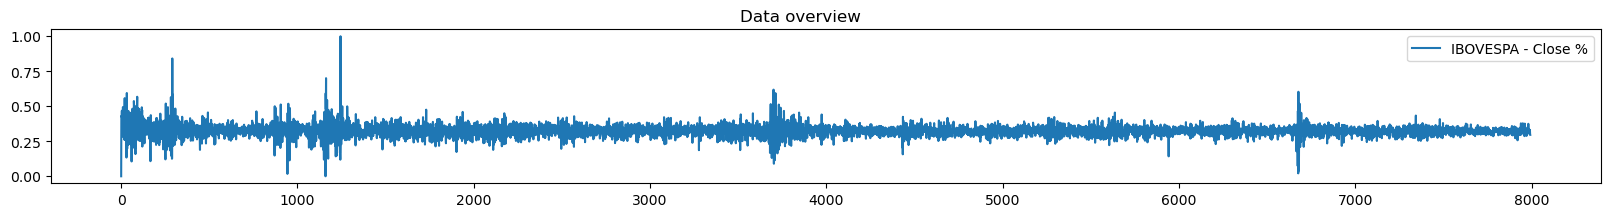

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >], dtype=object)

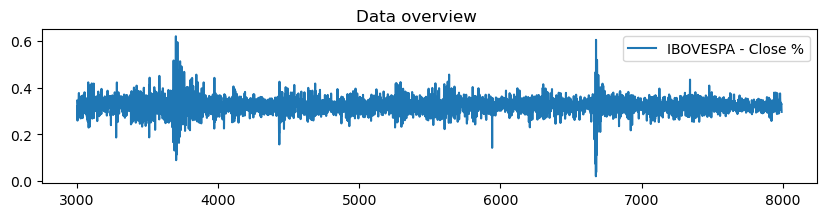

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >], dtype=object)

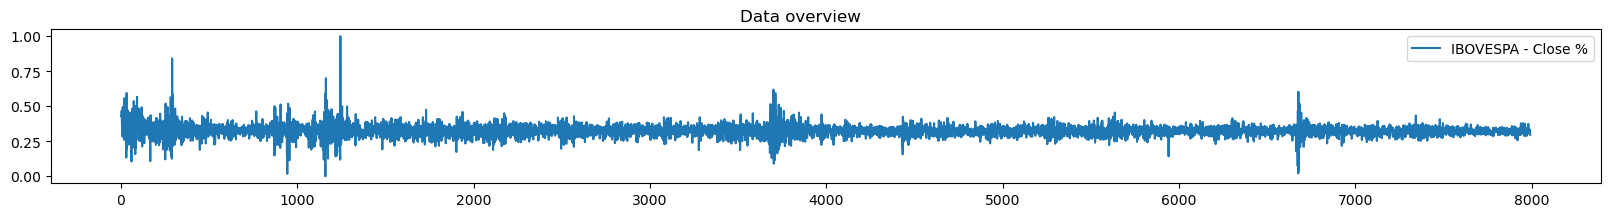

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close %']

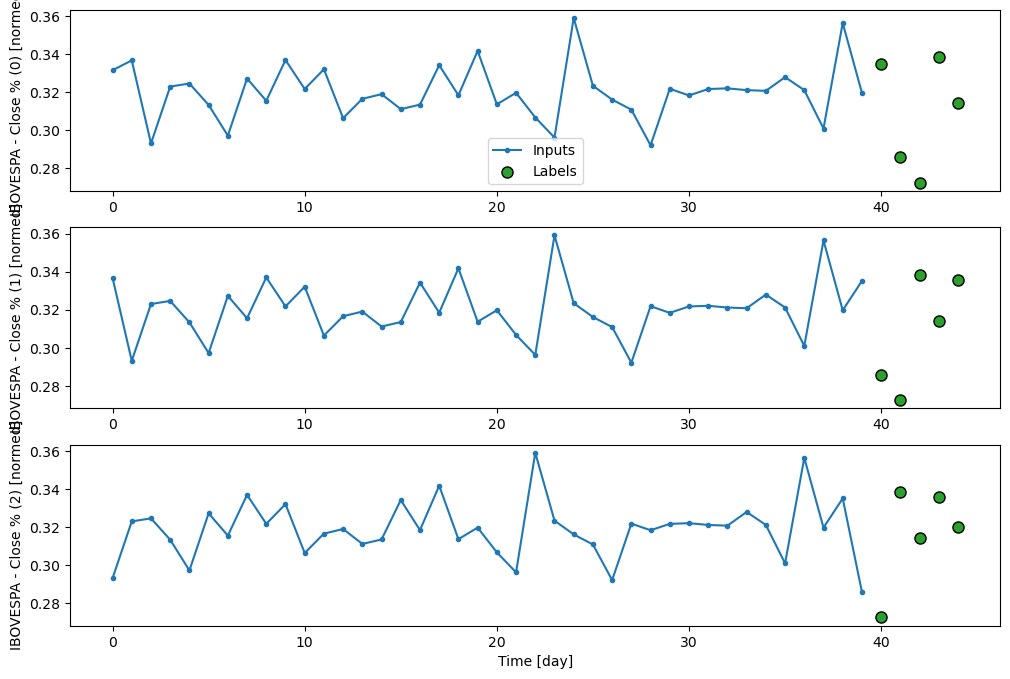

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

1

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 9:20 2s/step - loss: 0.3400 - mean_absolute_error: 0.3400 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3539

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.3061 - mean_absolute_error: 0.3061 - mean_absolute_percentage_error: 88.1487 - mean_squared_error: 0.1098 - root_mean_squared_error: 0.3299 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 77.4702 - mean_squared_error: 0.0920 - root_mean_squared_error: 0.3001

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 67.0723 - mean_squared_error: 0.0747 - root_mean_squared_error: 0.2678

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2132 - mean_absolute_error: 0.2132 - mean_absolute_percentage_error: 62.5090 - mean_squared_error: 0.0670 - root_mean_squared_error: 0.2524

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1922 - mean_absolute_error: 0.1922 - mean_absolute_percentage_error: 56.7920 - mean_squared_error: 0.0584 - root_mean_squared_error: 0.2338

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1758 - mean_absolute_error: 0.1758 - mean_absolute_percentage_error: 52.2238 - mean_squared_error: 0.0519 - root_mean_squared_error: 0.2190

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1666 - mean_absolute_error: 0.1666 - mean_absolute_percentage_error: 49.6324 - mean_squared_error: 0.0485 - root_mean_squared_error: 0.2106

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1586 - mean_absolute_error: 0.1586 - mean_absolute_percentage_error: 47.3560 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.2032

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1515 - mean_absolute_error: 0.1515 - mean_absolute_percentage_error: 45.3114 - mean_squared_error: 0.0429 - root_mean_squared_error: 0.1966

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1452 - mean_absolute_error: 0.1452 - mean_absolute_percentage_error: 43.4867 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1907

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1395 - mean_absolute_error: 0.1395 - mean_absolute_percentage_error: 41.8583 - mean_squared_error: 0.0386 - root_mean_squared_error: 0.1853

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1345 - mean_absolute_error: 0.1345 - mean_absolute_percentage_error: 40.4236 - mean_squared_error: 0.0368 - root_mean_squared_error: 0.1804

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1302 - mean_absolute_error: 0.1302 - mean_absolute_percentage_error: 39.3101 - mean_squared_error: 0.0353 - root_mean_squared_error: 0.1761

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1262 - mean_absolute_error: 0.1262 - mean_absolute_percentage_error: 38.2789 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1721

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 37.3378 - mean_squared_error: 0.0326 - root_mean_squared_error: 0.1684

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1195 - mean_absolute_error: 0.1195 - mean_absolute_percentage_error: 14776.5605 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1651

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1167 - mean_absolute_error: 0.1167 - mean_absolute_percentage_error: 27219.2617 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1622

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1141 - mean_absolute_error: 0.1141 - mean_absolute_percentage_error: 37781.6016 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1595

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1118 - mean_absolute_error: 0.1118 - mean_absolute_percentage_error: 46790.6172 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1570

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1095 - mean_absolute_error: 0.1095 - mean_absolute_percentage_error: 54506.1797 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1546

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1064 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 64099.5938 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1512

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 69410.0703 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1491

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 74002.3750 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1471

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1011 - mean_absolute_error: 0.1011 - mean_absolute_percentage_error: 77979.9297 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1452

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 81428.7734 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1434

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 84420.9141 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1417

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 87016.9922 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1400

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0952 - mean_absolute_error: 0.0952 - mean_absolute_percentage_error: 89268.3125 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1384

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 91218.5234 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1369

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0926 - mean_absolute_error: 0.0926 - mean_absolute_percentage_error: 92904.9453 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1354

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 94359.5781 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1340

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 96166.2500 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1320

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 97154.1406 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1307

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 97991.7578 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1295

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 98695.9453 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1283

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0858 - mean_absolute_error: 0.0858 - mean_absolute_percentage_error: 99281.4766 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1272

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 99965.1875 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1255

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 100307.3750 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1244

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 100569.8828 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1234

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0816 - mean_absolute_error: 0.0816 - mean_absolute_percentage_error: 100832.2891 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1219

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 100930.1719 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1209

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 100977.0156 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1195

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 100949.4844 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1186

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 100880.4922 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1178

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 100774.2578 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1169

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 100634.5547 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1161

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 100369.5547 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1149

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0755 - mean_absolute_error: 0.0755 - mean_absolute_percentage_error: 100160.2656 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1141

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 99803.9531 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1130 

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0741 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 99541.5078 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1122

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 99261.5312 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1115

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 98965.8672 - mean_squared_error: 0.0150 - root_mean_squared_error: 0.1108

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 98656.1719 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1102

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 98333.9609 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1095

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 98000.5938 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1089

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 97482.3281 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1080

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0704 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 97126.2812 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1074

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 96762.9688 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1068

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 96393.2812 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1063

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0691 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 96018.0391 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1057

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 95637.9844 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1051

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0683 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 95253.7891 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1046

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 94671.0859 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1038

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0673 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 94279.1484 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1033

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 93687.2656 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1025

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 93290.6641 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1020

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 92892.9297 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1016

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 92494.4062 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1011

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 92095.4297 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1006

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 91696.2969 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1001

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 91297.2812 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.0997

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0643 - mean_absolute_error: 0.0643 - mean_absolute_percentage_error: 90898.6328 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.0992

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 90500.5781 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.0988

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 90103.3203 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.0984

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 89707.0547 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.0979

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 89311.9531 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0975

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 88721.8203 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0969

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 88330.2734 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0965

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 87940.3750 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0961

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 87552.2422 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0957

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 87165.9688 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.0954

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0612 - mean_absolute_error: 0.0612 - mean_absolute_percentage_error: 86781.6406 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0950

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 86399.3516 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0946

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 86019.1719 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0942

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0603 - mean_absolute_error: 0.0603 - mean_absolute_percentage_error: 85452.9844 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0937

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 85078.3438 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0933

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 84706.0078 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0930

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 84336.0156 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0927

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 83968.4219 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0923

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 83421.5703 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0918

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 82880.2578 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0913

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - mean_absolute_percentage_error: 82522.5000 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0910

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 82167.2500 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.0907

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 81814.5234 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0904

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 81290.1953 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0899

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 80943.8281 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0896

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 80600.0156 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0893

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 80258.7500 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0890

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 79920.0391 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0887

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 79583.8828 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0884

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 79250.2656 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0882

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 78919.1875 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0879

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 78590.6484 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0876

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 78264.6328 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0873

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 77941.1328 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0871

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 77620.1406 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0868

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 77301.6406 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0865

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 76985.6172 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0863

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 76518.0625 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0859 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.8117 - val_mean_squared_error: 2.4282e-04 - val_root_mean_squared_error: 0.0156 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.7210 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1014

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 24.8436 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0949 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 23.5526 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0899

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 23.6862 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 23.5824 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 23.1626 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0879

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 22.3958 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0856

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 21.8516 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0841

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 21.3222 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0825

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.5391 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0803

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 20.0611 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0788

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 19.6515 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 19.3736 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0766

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 19.1111 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 8484.7334 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0545 - mean_absolute_error: 0.0545 - mean_absolute_percentage_error: 23388.1719 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 41587.6992 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0736

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 55920.9453 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 63795.3203 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0729

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 70572.8438 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 76421.5859 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0723

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 81479.3906 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 85860.1719 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0717

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 89658.6719 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 92954.2031 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 95813.5312 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 99405.9219 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0703

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 101403.9453 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 103129.7188 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 104615.9766 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 105890.9609 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 106979.1484 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0689

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 107901.8203 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 108677.5547 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 109600.6484 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 110075.8594 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 110452.8984 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 110856.8359 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 111031.4297 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 111139.3984 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 111187.6094 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 111182.1797 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 111128.5703 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 111031.6875 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110895.9141 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110725.1953 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110411.2266 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110037.0312 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 109758.6016 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 109303.3906 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 108977.8984 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 108636.9609 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 108282.2266 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107915.2109 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 107344.6094 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 106952.6094 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106552.5938 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 106145.5703 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 105732.4141 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105313.9609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 104890.9531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 104464.0625 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 103817.8203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 103383.8516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 102729.4375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 102291.5000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 101852.6953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 101413.3828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 100973.9062 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 100534.5547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 100095.6016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 99438.4688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597 

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 99001.5703 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 98348.5000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 97698.6875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 97267.5547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 96624.2891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 96197.9141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 95773.6406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 95141.3750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 94722.7422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 94306.5078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 93892.7266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 93481.4531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 92869.3672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 92464.5938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 92062.4844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 91663.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 91266.3750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 90872.4297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90481.2500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90092.8516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 89707.2422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 89324.4375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 88944.4453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 88567.2578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88192.8750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 87821.3125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 87452.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 87086.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 86723.4141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 86363.0312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 86005.4297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 85474.1953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 85123.4766 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 84775.4922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 84260.6406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551 - val_loss: 0.0129 - val_mean_absolute_error: 0.0129 - val_mean_absolute_percentage_error: 3.9470 - val_mean_squared_error: 2.6105e-04 - val_root_mean_squared_error: 0.0162 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 28.5265 - mean_squared_error: 0.0103 - root_mean_squared_error: 0.1013

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 25.9428 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0734 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 23.2503 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0913

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 23.0974 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0902

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 23.0028 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 22.3419 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0877

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 21.8099 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0861

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 20.9786 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0836

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.4514 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0819

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 19.9289 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0803

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.4419 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0788

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 18.9996 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 18.6321 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0558 - mean_absolute_error: 0.0558 - mean_absolute_percentage_error: 18.4919 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.2710 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 7888.4834 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 21743.5781 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 38662.9102 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 47886.9336 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 55786.6797 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 62575.7422 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 68427.1797 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 73482.3516 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 77857.6406 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 81649.5703 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 84938.6484 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 89074.3750 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 91379.6016 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 94271.5547 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 95875.9375 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 97257.6484 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 98969.1797 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 99901.5781 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 100689.0312 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 101347.6875 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 101891.6953 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 102333.4766 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 102684.0000 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 102952.9375 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 103148.8516 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 103322.2109 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 103367.0312 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 103361.9766 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 103312.1406 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 103222.0781 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 103095.8516 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 102937.1328 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 102749.2188 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 102535.0781 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 102297.3750 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 102038.5312 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 101615.3438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 101312.7422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 100995.7812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 100496.7500 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 100150.3203 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 99613.1172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619 

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 99058.0391 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 98679.6406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 98101.6094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 97710.3906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 97315.2578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 96916.8125 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 96515.6250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 95909.7656 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 95300.3516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 94892.7734 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 94280.3203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 93667.5000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 93259.2031 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 92851.4062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 92444.3203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 92038.1484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 91633.0859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 91229.2891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 90626.3047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 90226.3203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 89629.6562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 89234.2422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 88840.8203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 88449.4766 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 88060.2969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 87673.3359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 87288.6562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 86716.0391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 86337.2891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 85773.7578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 85215.8359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 84847.0469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 84480.8125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84117.1484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 83756.0625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83219.3203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 82864.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82337.7812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 81989.7422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 81644.3047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81301.4844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 80961.2656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 80623.6406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 80288.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 79956.1562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 79626.2734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 79136.2422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 78651.9297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 78334.0938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7464 - val_mean_squared_error: 2.3297e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 28.5940 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 25.8992 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0982 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 24.0170 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0923

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.3181 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 23.3175 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0888

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 22.7128 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0869

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 22.1940 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 21.6401 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 20.8356 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 20.3144 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.8256 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 19.1915 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 18.9330 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0755

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 18.7871 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.6376 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 15379.6250 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 28347.3301 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 39355.3867 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 48744.6133 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 56785.8398 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 63696.4922 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 69652.7188 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0716

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 74798.4297 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 79252.0859 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 83111.9219 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 86459.9062 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 89364.8516 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 91884.8594 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 95048.9141 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 96806.6797 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 98322.8828 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 99626.2656 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 100741.7188 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102108.9531 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 102843.0391 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 103716.5703 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 104355.6328 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 104669.7500 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0667

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 104996.2344 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 105129.0703 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 105202.2031 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 105213.1719 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 105162.4453 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 105070.7656 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 104942.2812 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 104688.6016 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 104371.4609 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 104129.5000 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 103866.0156 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 103583.2344 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 103283.1719 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 102967.6328 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 102638.2891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0628

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 102296.6172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 101943.9766 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 101581.6250 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 101210.6641 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 100832.1328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 100446.9531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 99858.5703 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615 

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 99460.3438 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 99058.1328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 98652.5547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 98244.1719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 97833.5078 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 97421.0156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 97007.1406 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 96592.2578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 95968.8359 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 95552.9453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 95137.1797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 94514.3203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 94099.9453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 93686.5000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 93274.1797 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 92863.1484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 92453.5703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 91842.2188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 91234.8672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 90832.3672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 90232.4531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 89637.3984 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 89243.5000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 88851.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 88462.7500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 88075.9844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 87691.6875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 87309.8984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 86741.9844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 86366.5938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 85993.7969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 85623.6172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 85256.0703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 84891.1641 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 84528.9141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 84169.3203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 83812.3828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 83458.1016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 83106.4844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82757.5234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 82411.2109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 82067.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 81726.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 81219.8750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 80719.1172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 80388.5234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 79898.0625 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 79736.9844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7485 - val_mean_squared_error: 2.3304e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 28.5637 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 25.8879 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0980 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 24.0146 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0921

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 23.3647 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 23.2550 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 22.8155 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0869

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 22.3031 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0853

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0646 - mean_absolute_error: 0.0646 - mean_absolute_percentage_error: 21.7530 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.9475 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 20.4216 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0798

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.9266 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 19.2809 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 19.0121 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.7684 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 8219.8818 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 22657.6504 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 34880.9805 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 45282.8633 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 58132.4258 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 68368.0000 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 74033.9922 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 81131.5781 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 86857.4844 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 91484.2266 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 94064.0078 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 96300.1875 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 98235.7734 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 99907.6328 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 101989.0547 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 103130.9609 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 104102.5703 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104923.1484 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105609.5000 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106176.3828 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 106830.6094 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107152.1797 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 107393.3359 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 107622.4062 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 107697.2734 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 107717.2969 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 107688.0703 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 107614.6172 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 107501.4219 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 107352.5078 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 107171.5000 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 106961.6484 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 106725.8906 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 106466.8828 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 106187.0000 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 105888.4219 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 105573.1016 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 105242.8125 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 104722.7812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 104361.7891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 103801.9922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 103223.5703 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 102829.2578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 102429.0078 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 102023.6328 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 101613.8359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 101200.2891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 100783.5859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 100153.8203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 99731.5547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602 

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 99307.8516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 98883.1328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 98457.7578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 98032.0547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 97606.3281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 96968.3125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 96543.7031 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 96119.9531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 95697.2578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 95275.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 94646.2891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 94228.6172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 93605.4531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 93192.4062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 92781.3828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 92168.8672 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 91763.3203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 91159.3594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90759.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 90362.5312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 89771.4609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 89380.6172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 88992.3750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 88606.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 88223.7891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 87654.3438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 87278.0781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 86904.5156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 86533.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 85982.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 85437.4688 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 85077.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 84542.6641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 84189.4922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 83839.0234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83491.2500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 83146.1562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 82803.7344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 82295.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 81959.2891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 81628.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.8067 - val_mean_squared_error: 2.4037e-04 - val_root_mean_squared_error: 0.0155 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.5022 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1005

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 25.8959 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 23.2908 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0899

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 23.2792 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 23.1443 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 22.7034 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 22.1914 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0854

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 21.3693 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0830

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.8384 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 20.3104 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0798

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.8147 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0783

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.3626 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.9812 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0557 - mean_absolute_error: 0.0557 - mean_absolute_percentage_error: 18.8241 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.6580 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.5045 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 15807.4014 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 29136.2832 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 40450.9375 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 50101.6680 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 62051.4922 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 68643.7422 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 74332.6016 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 81458.8438 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 85426.1875 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 90413.3125 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 93194.4766 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 95606.3438 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 97695.6562 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 99502.3828 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 101060.8125 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102400.5078 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103547.0234 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104952.3516 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106035.5703 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106604.7422 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107261.6094 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 107715.0859 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 107920.0625 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 108101.4453 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 108148.3438 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108143.0547 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108090.9141 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 107996.6875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 107785.6172 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 107603.8828 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 107393.1797 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 107029.2109 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 106758.3984 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106315.6328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 105999.0312 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 105667.4141 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 105145.2891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 104782.8359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104220.7812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 103640.0234 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 103244.1250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 102639.3516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 102230.0391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 101816.6250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 101399.7500 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 100980.0000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 100557.8984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 100133.9219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 99708.5156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599 

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 99282.0781 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 98854.9844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 98427.5625 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 98000.1250 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 97572.9453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 97146.2812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 96720.3594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 96295.4062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 95660.1875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 95028.1406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 94608.7891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 94191.2031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 93775.5000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 93155.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 92540.7266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 92133.5391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 91527.1406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 90926.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 90528.6406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 90133.6484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 89741.2266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 89157.4922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88579.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 88197.8906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 87818.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 87442.3281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 87068.6250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 86697.6484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 86329.4062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 85963.8906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 85601.1172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 85062.0703 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 84706.1094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 84177.2656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 83828.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 83481.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 83137.7969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 82796.6719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 82289.9453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 81957.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8487 - val_mean_squared_error: 2.4605e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.4626 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1006

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 24.8834 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0961 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0730 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 23.2286 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0906

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 23.0856 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 23.0042 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 22.6001 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0878

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0663 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 21.8263 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 20.9953 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0830

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 20.4654 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0813

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 19.6902 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 19.2161 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 18.8124 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0763

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.5511 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.4002 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 18.2462 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 8315.1768 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 22921.4844 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 35287.5078 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 50482.3203 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 58810.3906 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 65967.5547 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 72136.2500 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 77465.5156 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 82078.0391 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 86075.5703 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 89542.9844 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 92551.5625 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 95161.4609 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 97423.7500 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99381.9375 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 101073.3125 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 102529.9531 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103779.5156 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104846.0156 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105750.2969 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 106841.7656 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107415.2656 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 107881.0156 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108250.5469 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 108534.0625 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 108817.5547 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 108953.9297 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 108974.1875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 108912.7734 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 108755.8047 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 108605.1562 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 108422.0391 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 108209.7422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 107843.0078 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 107426.0625 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 107124.0000 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 106639.7188 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 106298.6250 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 105944.7656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 105579.5625 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 105204.2812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 104625.0000 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 104229.4062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 103827.3906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 103419.7812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 103007.3516 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 102381.1797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 101959.6172 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 101535.4297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 101109.1094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 100466.6641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 100036.9922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 99606.6484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593 

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 99175.9766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 98745.2891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 98314.8594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97884.9531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 97455.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 97027.6094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 96387.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95750.7109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 95328.1641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94697.7266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 94071.6875 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93656.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 93244.3828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92629.8359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 92223.0938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91617.5625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 91217.0000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90819.0000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 90423.6016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 90030.8203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89640.7031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 89253.2656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 88677.1797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 88296.5234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87730.6719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 87171.0156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86801.3438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 86252.0078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85889.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 85529.1875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84994.2734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84641.0781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 84290.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 83942.8359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 83597.7656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83085.1875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 82580.6016 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541 - val_loss: 0.0125 - val_mean_absolute_error: 0.0125 - val_mean_absolute_percentage_error: 3.8435 - val_mean_squared_error: 2.4494e-04 - val_root_mean_squared_error: 0.0157 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 28.4601 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1006

  2/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - mean_absolute_percentage_error: 27.4347 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.1018

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0758 - mean_absolute_error: 0.0758 - mean_absolute_percentage_error: 24.0100 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0935 

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 23.0037 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 22.8671 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 22.4328 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0880

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0672 - mean_absolute_error: 0.0672 - mean_absolute_percentage_error: 21.9153 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0864

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0654 - mean_absolute_error: 0.0654 - mean_absolute_percentage_error: 21.3624 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0848

 18/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0636 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 20.8013 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0831

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0620 - mean_absolute_error: 0.0620 - mean_absolute_percentage_error: 20.2725 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0815

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 19.5028 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0791

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 19.0328 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0776

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 18.4514 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 18.3030 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.1460 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 18.0024 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 16087.5205 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 35643.1914 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 46272.6836 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 55358.2812 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 66632.7969 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 72863.7266 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 78246.7578 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 82905.8281 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 86943.6875 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 90446.0859 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 93485.0156 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 96121.2500 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 98406.3594 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 100384.3047 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 102092.7500 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 103564.0859 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104826.2656 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105903.5234 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106816.9297 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107584.8750 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108223.4453 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108969.1484 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109495.8672 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109742.2969 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109915.1406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110022.0312 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110069.7656 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110043.5078 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 109968.4531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 109781.0234 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 109612.0156 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109411.9219 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109183.8906 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 108930.7812 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108655.1562 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108359.3359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 107882.3047 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107544.7969 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107193.6328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106830.3047 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106456.1719 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106072.4688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105680.3203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105280.7422 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 104874.6719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104462.9531 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104046.3594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103413.8672 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 102774.1250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 102344.5156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 101913.0078 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101480.0469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101046.0391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100611.3516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 100176.3438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 99741.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589 

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99306.5391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98872.2891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 98438.8047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97790.4766 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 97144.9922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 96716.5234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96076.9844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 95441.6250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95020.5703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 94392.9922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 93977.4141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93564.1719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 92948.8203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 92541.6875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92137.0859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91735.0703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91335.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90741.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90348.8750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0559

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 89958.8906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89571.6406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 88995.9375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88426.4609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88050.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87676.8906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87306.2734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 86755.5703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86391.8984 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86031.0000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85494.8281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85140.8203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84789.5469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84440.9922 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84095.1562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 83582.0781 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 83413.5703 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540 - val_loss: 0.0123 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 3.7921 - val_mean_squared_error: 2.3787e-04 - val_root_mean_squared_error: 0.0154 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0836 - mean_absolute_error: 0.0836 - mean_absolute_percentage_error: 28.4754 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.1004

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0784 - mean_absolute_error: 0.0784 - mean_absolute_percentage_error: 24.9066 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0962 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0731 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 23.2114 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0907

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 22.9626 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0697 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 22.6550 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 22.1565 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0871

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 21.6165 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 21.0558 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0838

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 20.5156 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0821

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 19.9881 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0805

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 19.4819 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0790

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 19.0124 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0775

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0562 - mean_absolute_error: 0.0562 - mean_absolute_percentage_error: 18.4313 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 18.2048 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 18.0526 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 8393.1748 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 23137.1309 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 41141.9102 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 55321.7812 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 63111.9023 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 69816.8984 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 75603.0547 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 80606.7422 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 84940.6562 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0702

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 88698.5078 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 93423.3828 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 96057.8750 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98341.4766 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0688

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 100318.1172 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 102788.3984 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104757.1484 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105833.6953 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106746.5000 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107513.9375 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108152.0938 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108675.0625 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109095.2734 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109556.5078 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109765.0000 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 109903.8750 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 109980.3359 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110000.7891 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 109938.7969 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 109842.9531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 109628.2891 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109339.7812 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109111.9062 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108723.8984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108438.0938 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108133.1875 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 107811.1797 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107473.8906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 106942.8438 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 106574.2031 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106195.3828 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 105807.5781 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105411.8594 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105009.1875 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 104600.4609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 103977.7656 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103557.2891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103133.2891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 102706.3672 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 102277.0469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 101845.8203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101413.1484 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0594

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 100979.4219 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 100545.0234 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 99892.9062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589 

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99458.2578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 98807.1094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 98373.9062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 97941.6875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 97510.6406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97080.9453 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 96652.7578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96226.2344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 95801.5156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95168.0547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 94748.3203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94122.8203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93708.6719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93296.8906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 92887.5391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92480.6719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 91875.1406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91275.4609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 90878.9844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90485.1875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90094.1016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89705.7422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89320.1250 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 88937.2578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88557.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88179.8516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 87805.3125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87433.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87064.5703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86698.3672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86334.9453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 85974.2812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85616.3828 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85261.2344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 84908.8203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84559.1406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84039.7109 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 83526.9688 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 83358.5703 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7334 - val_mean_squared_error: 2.2997e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.5107 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 24.8910 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0957 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 23.2004 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 22.9883 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 22.8564 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0888

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.1707 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0868

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 21.3568 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0843

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 20.7965 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0827

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 20.0051 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0803

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.4985 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0787

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 19.0284 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0773

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.4466 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0755

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.2975 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.1394 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 17.9948 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 16116.3525 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 29706.4805 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 41242.9062 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 55457.5938 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 63266.8438 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 72994.4609 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 78387.1484 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 83054.5781 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 87099.6797 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 90608.3672 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 93652.7500 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 96293.7109 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 99609.6406 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101451.7812 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 103040.7578 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 105014.3438 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106093.5312 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107008.5781 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107777.9062 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108417.6250 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108941.8828 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109363.1172 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109692.3203 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109939.1953 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110173.7109 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110250.3594 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110270.8594 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110240.9453 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110165.7578 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110049.8828 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 109897.4453 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109712.1484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109497.3281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109255.9844 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108990.8359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108704.3281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108398.6719 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107908.6250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107563.4766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107021.9844 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106647.1875 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106262.7969 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105869.9375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105469.6484 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105062.8438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104650.3906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104022.7734 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103386.5000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 102958.5312 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102312.2266 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 101879.1562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101444.8438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101009.6719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100574.0000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99920.2734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588 

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99484.7188 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 98832.4531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98182.1484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 97750.0469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97319.2891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 96890.0547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96462.4922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95824.5469 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95401.7031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 94771.3750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94146.0312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93732.0469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93115.5938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92707.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92302.4062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91899.6719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91499.5625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 90904.3906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90315.2969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89925.9844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89539.4141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89155.6172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88774.5938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88396.3438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87834.2031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87462.9219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87094.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86546.9062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86185.3594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85648.2266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85293.5781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84941.6719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84418.9297 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 83902.2812 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 83563.2344 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7533 - val_mean_squared_error: 2.3262e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 28.4911 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002

  4/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0781 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 24.8957 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0959 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 23.2023 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0904

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 22.9822 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0893

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 22.8444 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 22.4094 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0876

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 21.6151 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0853

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 21.0547 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0836

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - mean_absolute_percentage_error: 20.5146 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0820

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0609 - mean_absolute_error: 0.0609 - mean_absolute_percentage_error: 19.9873 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0803

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 19.4811 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0788

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 19.0115 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0774

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0567 - mean_absolute_error: 0.0567 - mean_absolute_percentage_error: 18.6117 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0761

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0553 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 18.2809 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 18.1227 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 8411.0156 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0728

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 29696.8438 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 41229.5273 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 51066.2266 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 59490.6914 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 66730.6953 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 72970.7891 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 78361.7344 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 83027.6484 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 87071.4375 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 90578.9844 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 93622.3828 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 96262.4922 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 98550.9609 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 100531.8125 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 102242.7656 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103716.2578 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104980.2891 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106059.1328 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106973.8828 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108077.9844 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108658.1250 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109129.2656 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109503.0781 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 109789.8828 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 109998.8125 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110137.9922 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110214.6094 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110235.1094 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110172.9844 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110076.9375 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 109942.3359 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109676.5781 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109461.8281 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109220.5703 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 108955.5078 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108669.0859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108204.2109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107873.6484 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107528.6094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107170.6562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106612.6094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106032.9766 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105636.4062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105232.8750 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 104823.2812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104408.4297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 103989.0547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103565.8359 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103139.3984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 102710.3047 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102062.7734 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101629.1719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 100976.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100323.5547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99887.8750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588 

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99452.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99017.5859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98583.4609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 97934.1797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97502.8672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 96858.6484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96431.2188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96005.5859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95581.8750 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95160.2031 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 94740.6484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94323.3203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93908.2891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0568

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93495.6328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93085.4062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92677.6719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92272.4844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91869.8750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91469.8984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91072.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90677.9375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90286.0234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 89896.8281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89318.2031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88935.9141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88556.4062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88179.6719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87805.7266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87434.5703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87066.1953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86700.6094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86337.7891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85977.7500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85620.4609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85089.6953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84739.2656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84391.5625 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 83875.0859 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 83536.1406 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7394 - val_mean_squared_error: 2.3077e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4997 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 25.9357 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0986 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 23.9814 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0928

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 22.8906 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 22.9644 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 22.6624 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.1665 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0868

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0651 - mean_absolute_error: 0.0651 - mean_absolute_percentage_error: 21.3524 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0843

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 20.7921 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0827

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 20.2636 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0811

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 19.7426 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0795

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.2561 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0780

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.8143 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0766

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.4423 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0755

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.2147 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.0618 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 8418.0811 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23205.8672 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 35725.5312 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 51109.1406 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 59540.6836 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 66786.7734 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 73032.1094 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 78427.5859 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 83097.4219 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 87144.6094 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 90655.1094 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 93701.0625 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 96343.3906 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 98633.7734 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 100616.2969 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 102328.6875 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103803.4219 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105068.5156 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106625.3359 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107833.5000 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108473.5469 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109220.9688 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109595.0938 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 109882.1406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110169.1562 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110276.2969 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110324.1328 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110318.7500 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110265.5703 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110222.5859 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110106.6562 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 109954.1406 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109664.7734 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109312.3516 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109047.0625 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108609.7656 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108295.1328 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107964.2969 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107618.9609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107260.7109 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106702.2031 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106317.6094 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105924.5547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105321.3047 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 104911.3672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104286.8203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103865.0938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103439.8359 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 102796.6094 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102365.0000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101931.7109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101497.1719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101061.7812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100625.8828 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100189.8125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99753.8750 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587 

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99318.3359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98883.4375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98449.4141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98016.4688 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97584.7969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97154.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96725.9219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96299.0234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95873.9766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95450.9141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95029.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94611.1328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94194.5938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93780.3984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93163.6250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92755.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92350.0156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91947.0703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91546.7578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91149.1016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90754.1328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90166.7812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89778.6406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89393.2578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88820.3828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88441.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88066.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87693.4219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87139.3516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86591.5469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86229.8203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85692.4062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85337.5781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 84985.4922 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84636.1328 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84289.4922 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 83775.2344 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 83606.3359 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7424 - val_mean_squared_error: 2.3115e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4962 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 24.8839 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0957 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 23.1980 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0902

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 22.9912 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0702 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 22.8623 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0686 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 22.4322 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0875

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0660 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 21.6411 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0851

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 21.0816 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0835

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 20.2770 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0810

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0601 - mean_absolute_error: 0.0601 - mean_absolute_percentage_error: 19.7558 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0794

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 19.2689 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0780

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.8269 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0766

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.4545 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.2265 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0741

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.0733 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 8419.2988 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23209.2090 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 35730.6719 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 51116.4883 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 59549.2422 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 66796.3750 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 73042.6094 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 80857.9453 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 85205.3594 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 88974.9297 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 93714.5234 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 96357.2266 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 98647.9453 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 100630.7500 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 102343.3906 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104475.5781 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105645.3438 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106640.6562 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107481.2422 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108489.1328 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109236.6641 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109610.8438 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 109897.9297 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110107.0703 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110292.1328 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110339.9844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110334.6016 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110238.4219 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110122.4688 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109969.9375 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109784.5156 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109569.5547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109198.2109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108921.9062 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108625.3672 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108147.1641 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107808.8281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107276.1250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106906.3281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106526.3359 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106137.3203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105740.3672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105336.4375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 104926.4375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104511.1797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104091.3906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103454.6953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103026.4453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102595.7812 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102163.2188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101729.1875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101294.1172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100858.3672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100204.2109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99768.2109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586 

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99115.0312 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98680.4844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98246.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97814.5234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97383.4844 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96739.8281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96312.8594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95887.7578 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95464.6328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95043.5938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94624.7344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94208.1328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93587.6406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93177.0078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92768.8750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92363.2812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91960.2812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91360.7188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90964.3516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90570.6797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90179.7422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89791.5391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89406.1016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89023.4375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88643.5469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88266.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87892.1328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87520.6094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87151.8750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86785.9297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86422.7578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86062.3516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85704.7188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85349.8359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84822.6562 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84474.6094 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84129.2812 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83618.3516 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7268 - val_mean_squared_error: 2.2875e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.5201 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1000

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 25.9295 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 23.1934 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0900

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 22.9888 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 22.6723 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.1784 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0866

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 21.6409 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0850

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.0814 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0834

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.5415 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.7553 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0794

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.2683 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.8261 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4538 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.3041 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.1455 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 18.0002 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23187.8398 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 35697.7656 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 46343.5391 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 55443.0547 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 63250.2578 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 69969.9531 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 75768.7969 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 80783.4609 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 85126.8672 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 88892.9609 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 92160.3828 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 94995.3203 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97453.8125 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99583.5234 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101425.1797 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 103722.6953 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 104986.8047 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106065.7109 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107382.2344 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108084.6875 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 108913.3125 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109334.4375 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109663.5547 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110005.6328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110144.8203 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110221.4453 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110241.9375 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110212.0391 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110136.8672 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110021.0234 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109868.6250 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109683.3828 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109468.6172 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109227.3359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108962.2578 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108675.8281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108370.2500 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108047.5391 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107709.5078 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107177.3047 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106807.8438 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106234.9297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105842.1797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105441.9922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 104829.7812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104414.8984 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 103784.3203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103145.7969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 102716.6719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102069.1016 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0595

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101635.4766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101200.8047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100765.4531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100329.7734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99676.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586 

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99241.1016 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98589.5781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 97940.2578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97508.9141 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97079.0156 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96650.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96224.1406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95587.8047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95166.1016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94746.5312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94329.1719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93914.1172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93296.0000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92886.9844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92278.2031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 91875.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91475.5703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91078.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90683.5625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90096.6719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89708.8281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89323.7422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88941.4297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88561.8984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88185.1406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 87811.1719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87255.4453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 86888.4453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86524.2188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86162.7656 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85804.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85271.2188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84919.4062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84396.7969 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84051.7812 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 83541.3281 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7403 - val_mean_squared_error: 2.3083e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4990 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 24.8810 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0957 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 23.1935 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0902

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 22.9627 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 22.6620 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.1667 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0867

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 21.6286 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0851

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 21.0690 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0835

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 20.5291 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0818

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.0013 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0802

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.4946 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0787

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 19.0244 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0773

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0561 - mean_absolute_error: 0.0561 - mean_absolute_percentage_error: 18.4424 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.2929 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0746

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.1345 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 8412.9160 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23191.6094 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 35703.5742 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 46351.0820 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 55452.0859 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 63260.5586 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 69981.3516 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 78379.3672 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 83046.3281 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 87091.0312 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 90599.3672 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 93643.4453 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 96284.1484 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 98573.1328 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 100554.4297 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 102265.7734 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103739.5938 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105003.9141 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106082.9922 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106997.9531 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108102.2969 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108682.5703 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109153.8125 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109527.7109 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109928.2812 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110162.7656 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110239.4062 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110259.9062 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110230.0000 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110154.8203 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110038.9531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 109886.5312 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109701.2578 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109486.4531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109115.3984 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 108839.3047 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108542.9844 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108228.5547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107897.9141 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107375.3047 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107011.3594 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106445.5469 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105859.4297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105459.1719 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105052.4141 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104639.9922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104012.4453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103589.1328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103162.6016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102517.9688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102085.7344 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101652.0391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101217.2891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100781.8672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100346.1172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 99910.3438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587 

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99474.8359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99039.8594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98605.6406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98172.3984 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 97740.3359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97309.6250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 96880.4297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96452.9062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 95815.0312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95392.2266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94761.9609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94344.5312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 93929.4141 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93516.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93106.3438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92495.5547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92091.5547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91690.1719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91093.0547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90698.3359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90111.3438 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89723.4375 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89338.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 88955.9141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88576.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88012.1406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0550

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87454.2344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87085.7734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86538.3047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 85997.0781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85639.7188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85285.1016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84933.2344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84584.0938 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84237.6641 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 83893.9453 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 83554.9297 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7366 - val_mean_squared_error: 2.2966e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0069


Epoch 16/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.5215 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1000

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 25.9359 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 23.2027 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0901

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 22.9963 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 22.6784 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.1840 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0866

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.3707 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0842

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.5464 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0818

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.0184 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0802

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.5115 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0786

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 19.0410 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0772

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.6405 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.3084 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.0765 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 8429.4600 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 29761.9961 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 41319.9883 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 51178.2773 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 63385.1055 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 70119.1406 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 78533.6875 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 85308.3750 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 89082.5000 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 93827.8281 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 96473.7344 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 98767.2188 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101641.4453 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 103233.3906 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105210.6641 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106769.5938 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107611.2031 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108315.1562 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108896.5703 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109368.7422 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109897.3906 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110144.7266 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110379.6797 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110473.3984 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110468.0078 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110371.7188 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110255.6250 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110102.8984 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109917.2578 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109702.0391 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109460.2422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109194.6016 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108907.5547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108601.3281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108277.9297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107939.1797 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107586.7266 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107222.0703 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106846.5625 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106461.4531 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106067.8672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105666.8281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105259.2656 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104637.5391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104217.2500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103579.7891 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 102935.6953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102503.5000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102069.6250 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101634.5000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101198.5156 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100543.7031 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100107.0703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99452.7109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585 

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99017.2266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98582.6172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97932.7891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97501.2344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97071.1953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96642.8281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96003.6953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95580.0625 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95158.5156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94530.3047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94114.3594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93494.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93085.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92677.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92272.8906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91870.7109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91471.1875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91074.3359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90680.1953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90288.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89900.1094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89514.2031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89131.0781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88561.6016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88185.4453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87812.0703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87441.5000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86890.8594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86527.2500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86166.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85630.3438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85276.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84925.2188 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84576.7500 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84231.0000 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83719.4531 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7356 - val_mean_squared_error: 2.2995e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0067


Epoch 17/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.5055 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1000

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 25.9281 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0985 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 23.1926 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0901

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 22.9837 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 22.6636 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 21.9070 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0859

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.3554 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0842

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 20.7954 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0826

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.2669 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0810

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.7457 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0794

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.2590 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.8171 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0766

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4449 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0552 - mean_absolute_error: 0.0552 - mean_absolute_percentage_error: 18.2951 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.1365 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 17.9912 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23234.7930 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 35770.0742 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 46437.4258 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 55555.3867 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 63378.4141 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 70111.7344 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 49/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 75922.3281 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 83201.0547 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 89073.0938 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 92347.1328 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 96463.5469 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 98756.7891 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 100741.7812 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 103222.4922 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104590.8516 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106280.6484 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107197.3125 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107967.9922 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108885.0703 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109556.0078 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109885.7891 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110133.1016 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110306.5625 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110413.8359 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110444.8125 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110465.3438 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110435.3828 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110360.0625 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110243.9844 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110091.2734 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 109905.6562 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109690.4531 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109448.6875 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109183.0703 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108896.0547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108589.8594 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108266.5000 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107927.7812 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107575.3672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107210.7500 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106643.8750 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106254.4297 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105857.0391 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105452.6641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105042.2109 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104626.4922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104206.2422 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103782.1406 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103354.8125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102924.8203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102492.6719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102058.8438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101623.7656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101187.8203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100751.3828 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100314.7734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99878.2891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586 

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99442.2031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99006.7656 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98572.2031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98138.7188 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97706.5078 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97060.9375 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96632.6172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96206.0938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95781.5000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95148.4531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94729.1328 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94312.0703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93690.8984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93279.8125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92871.2266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92465.1875 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92061.7422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91660.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91262.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90670.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90084.5781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89697.3281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89121.6562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88741.3516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88363.8281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87989.1094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87617.1719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87248.0312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86881.6719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86337.3594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85799.2734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85444.0000 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85091.4766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84741.6875 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84394.6172 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83879.7109 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83710.6016 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7383 - val_mean_squared_error: 2.3029e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0065


Epoch 18/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.5096 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1000

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 25.9247 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0985 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 23.9712 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0927

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 22.8858 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 22.8569 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.4272 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0874

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 21.9123 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.0770 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0834

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.5372 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.7509 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0794

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.2639 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.8217 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4494 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.2997 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.1411 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 17.9959 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23219.3594 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41288.1641 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 51138.8555 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 59575.3008 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 66825.6094 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 73074.5781 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 78473.1875 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 83145.7422 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 89013.8750 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 92285.7422 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 96399.4141 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 98691.1328 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 100674.8047 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 102388.1953 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 103863.7812 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105691.5938 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106687.3438 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107528.3047 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108231.7109 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109061.4609 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109483.1641 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109812.7266 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110155.2734 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110294.6484 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110371.3828 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110391.9062 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110361.9609 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110233.5078 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110098.7188 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109929.2266 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109728.5547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109499.8672 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109246.0234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108969.6016 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108672.9297 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108358.1172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 107856.0312 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107503.8438 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107139.4688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 106764.2578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106379.4453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 105986.1562 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105585.4219 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 104972.3828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104556.9375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103925.5000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103499.9922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103071.5469 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102424.5391 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 101990.9922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101338.4609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 100684.4062 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100248.0859 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99593.9297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585 

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99158.4297 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98723.6875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98073.4766 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97426.1250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96996.4141 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96355.0312 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95717.8281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95295.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94875.4062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94457.4844 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93834.9375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93422.9062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93013.3359 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92403.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92000.5469 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91600.0000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91202.1172 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90806.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90219.2266 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89830.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89445.2500 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89062.4141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88682.3594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88117.5078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87744.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87374.1406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87006.6328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86460.5938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86100.0391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85742.2500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85387.2109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85034.9219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84511.6016 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84166.1172 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83654.9609 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7185 - val_mean_squared_error: 2.2690e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0064


Epoch 19/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 28.5441 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0775 - mean_absolute_error: 0.0775 - mean_absolute_percentage_error: 24.8699 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0952 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 23.1912 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 22.9826 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 22.6898 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0878

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 22.1984 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0864

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 21.3872 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 20.8275 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0824

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 20.2985 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0808

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 19.7764 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.2887 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 18.6551 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0758

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.3952 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0748

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.2446 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 18.0911 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0731

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 8428.0244 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23233.2656 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 35767.7070 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 51169.4688 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 59610.9609 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 70107.0625 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 75917.2656 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 80941.7578 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 87247.4688 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 90762.1094 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 95181.4688 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 98750.2031 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 100735.0547 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103215.6016 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104583.8750 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105754.8516 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107190.1562 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107960.7812 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108601.5859 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109126.7344 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109548.6875 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 109878.4531 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110125.7422 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110299.1953 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110406.4609 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110457.9688 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110428.0078 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110299.4844 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110164.6094 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109995.0156 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109683.1250 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109441.3750 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109175.7812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108737.9609 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108422.9609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108091.7344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107745.9922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107387.3203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107017.1406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106636.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106247.3359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105849.9688 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105445.6250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105035.2031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104619.5078 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104199.2812 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103775.2109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103347.9141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102702.1250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102269.1094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101834.6328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101181.0703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100744.6562 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100089.8125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99435.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99000.1562 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98348.7500 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97915.9062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97484.4219 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97054.4609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96626.1641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96199.6719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95775.1094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95142.1094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94722.8125 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94098.1406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93684.6406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93273.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92661.7031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92256.9844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91854.8750 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91455.4141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91058.6328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90664.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90273.2109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89884.6094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89498.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88925.2188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88357.9375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87983.2344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87426.4219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86875.8750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86512.3281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86151.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 85793.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85438.3047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85085.7969 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84736.0312 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84388.9844 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84044.6406 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83705.0156 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7355 - val_mean_squared_error: 2.2969e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0062


Epoch 20/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.5170 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1000

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 24.8771 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0955 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 22.8867 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 22.9650 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.4243 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 21.6329 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0850

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0641 - mean_absolute_error: 0.0641 - mean_absolute_percentage_error: 21.0734 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0834

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0624 - mean_absolute_error: 0.0624 - mean_absolute_percentage_error: 20.5335 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 20.0052 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0801

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.2596 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.6267 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0759

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.3673 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0749

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.1367 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 17.9915 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 16123.2266 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 29719.1602 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41260.5117 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 51104.6055 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 59535.3984 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 70018.1953 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 78420.6250 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 83090.0469 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 87136.8750 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 90647.0625 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 93692.7422 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97521.0078 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99652.1797 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 102319.6094 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104451.3047 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105620.7969 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107054.2812 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 107823.9297 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108463.9219 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109211.2812 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109585.3750 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 109872.3906 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110081.4844 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110266.5078 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110317.9531 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110288.0312 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110212.8125 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110096.8828 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 109855.5859 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109544.0938 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109172.8359 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 108896.6016 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108600.1250 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108285.5312 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 107954.7188 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107609.4141 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107251.1953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 106881.4922 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106501.5859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106112.6562 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 105715.7969 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105107.7188 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 104695.0859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104067.2031 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 103643.6719 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103216.9141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102787.4922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102139.4766 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101488.1719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101052.8125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100616.9531 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100180.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 99527.2109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585 

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 98874.6641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98440.6797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 97791.7891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97145.9453 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 96717.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96290.4766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95653.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95231.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 94602.7422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 93978.8594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93565.8906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 92951.0234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92544.2500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92140.0391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 91738.4453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91339.4922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 90943.2109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90549.6328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 89964.3828 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89577.6562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89193.6875 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88812.5000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88434.0938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87871.7109 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 87500.2734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 86948.3438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86402.6719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86042.3516 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85507.0547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85153.6328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 84802.9453 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84282.0156 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 83767.7969 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83598.9141 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7271 - val_mean_squared_error: 2.2763e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0061


Epoch 21/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 28.5518 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 25.9262 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0980 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 23.2008 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0897

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 23.0018 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 22.7128 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0878

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0666 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 21.9628 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0856

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0648 - mean_absolute_error: 0.0648 - mean_absolute_percentage_error: 21.4127 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0840

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 20.8532 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0823

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 20.3237 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0807

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 19.8010 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.3127 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.8693 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.4177 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0748

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.2665 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0739

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 18.0397 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 16172.9521 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 29810.8242 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 46518.5234 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 55652.4023 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 63489.0898 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 70234.1641 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 76054.9062 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 83346.3438 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 87405.6562 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 90926.6719 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 93981.7500 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 96631.9922 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 98929.2422 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 100917.6953 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103402.7422 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104773.4922 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105946.5938 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106944.7422 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108156.5234 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109075.2031 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109548.1484 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110077.6719 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110421.0391 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110560.7500 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110654.6172 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110649.2188 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110595.8750 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110436.4844 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110283.5156 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110097.5625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109764.0469 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109639.8047 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109373.7188 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109086.2031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108779.4766 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108455.5469 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108287.7109 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107941.3438 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107763.2109 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107397.9531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107021.8281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106636.0859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106439.9688 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106041.8750 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105636.7969 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105225.6250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104809.1797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104388.1953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103963.3594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103535.2812 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103104.5391 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102671.6328 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102237.0469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 101801.2109 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101364.5078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100927.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100489.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100052.6875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99615.8359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99179.6406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98744.3125 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98310.0781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97877.1094 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97445.5859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97015.6641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96801.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96374.0781 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95948.7422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95525.4453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95314.5938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94894.5391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94476.7500 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94061.3125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93648.2812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93237.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92829.6953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92424.2422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92021.4062 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91621.2188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91223.7188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90828.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90632.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90241.8750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89853.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89661.0234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89277.2656 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88896.2969 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88518.1250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88142.7422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87770.1641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87400.3750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86850.9297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86488.1094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86128.0703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85593.1953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85240.0547 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84889.6484 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84369.1562 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83856.7656 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 3.7162 - val_mean_squared_error: 2.2610e-04 - val_root_mean_squared_error: 0.0150 - lr: 0.0059


Epoch 22/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 23s 101ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 28.5681 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0996

  3/237 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 25.9214 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0979  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 23.9710 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0921

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 22.9017 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0881

  8/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 23.0134 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 10/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 22.8999 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 12/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.4778 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 13/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0674 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 22.2267 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0862

 14/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 21.9666 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 15/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 21.6916 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0847

 17/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 21.1330 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0830

 19/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.5928 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814

 21/237 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 20.0634 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 23/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0590 - mean_absolute_error: 0.0590 - mean_absolute_percentage_error: 19.5547 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0783

 25/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 19.0826 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 27/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.6806 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 29/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 18.4201 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 31/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.2691 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 33/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0538 - mean_absolute_error: 0.0538 - mean_absolute_percentage_error: 18.1155 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0730

 35/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0531 - mean_absolute_error: 0.0531 - mean_absolute_percentage_error: 8443.5928 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 37/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 23276.1973 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 35833.8047 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 41/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 46520.1562 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 44/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 59721.1328 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 66989.1875 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 73253.4531 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 78665.2812 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 83349.2656 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 89231.7656 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 92511.6406 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 60/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 96635.3828 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 98932.7109 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 100921.2422 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 102638.8281 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104118.0234 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105386.9531 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106469.9766 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107388.2656 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108160.3203 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108802.3125 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109328.4297 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109751.1641 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110215.1719 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110424.9141 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110564.6328 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110641.5469 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110662.1250 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110632.1094 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110503.3438 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110287.3828 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110101.4297 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109885.8438 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109643.6484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109236.3281 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108938.9297 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108623.3516 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108291.5078 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107945.1250 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107585.7891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107214.9297 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106639.8281 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106245.5781 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105843.8672 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105435.6172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105021.6953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104391.8594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103967.0000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103538.9141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103108.1484 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102458.1172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102022.8359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101586.5000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101149.4922 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100712.1484 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100274.7891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99837.6953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99401.1250 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98965.3203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98530.5000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98096.8594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97664.5781 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97233.8203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96804.7344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96377.4609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95952.1094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95528.7969 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95107.6172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94688.6719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94272.0312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93857.7734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93445.9609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93036.6484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92629.8906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92225.7188 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91824.1953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91425.3359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90832.1094 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90440.0391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89857.0938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89471.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89089.5547 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88521.2188 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88145.8281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87773.2344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87403.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87036.4219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86491.1406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86131.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85773.7969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85419.2734 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85067.4922 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84718.4375 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84372.1094 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83859.7031 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7199 - val_mean_squared_error: 2.2759e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0058


Epoch 23/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5347 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 25.9206 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0982 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 23.1951 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0898

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0709 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 23.0072 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 22.8914 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 22.4685 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0872

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 21.6823 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0849

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0631 - mean_absolute_error: 0.0631 - mean_absolute_percentage_error: 20.8481 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0824

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 20.3188 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0808

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 19.7960 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0792

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.3077 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.8642 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4907 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.3402 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 18.1808 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 18.0351 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23284.6719 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 35846.8594 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 46537.1094 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 43/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 55674.6406 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 63514.4609 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 70262.2344 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 76085.3047 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 81120.9141 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 85482.4688 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 89264.2969 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 92545.3672 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 95392.1484 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97860.9141 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 100958.0312 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 102676.2422 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104155.9844 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105425.3750 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0674

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106508.7891 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107427.4141 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108199.7500 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108841.9766 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109368.2812 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 109967.3281 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110255.3516 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110465.1719 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110604.9375 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0648

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110681.8828 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110702.4609 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110672.4375 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110596.9531 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110480.6250 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110238.4844 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110037.2422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109683.6172 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109276.1484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108978.6406 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108498.8828 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108159.4453 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107806.2734 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107440.8672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107064.6016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106482.5000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105882.4453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105474.0547 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104851.0625 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104429.9141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104004.9062 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103361.5000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102712.6641 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0595

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102277.8984 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101623.5391 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101186.3672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100748.8672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100311.3438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99874.0859 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585 

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99219.2734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98783.7734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98349.3594 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97700.1875 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97269.2656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96840.0234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96412.5938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95987.0859 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95563.6172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95142.2891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94723.1953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94306.3984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93891.9922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93480.0312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 92866.7891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92461.1719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92058.1719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91657.8281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91062.3516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90473.0078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90083.5469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89696.8516 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89312.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 88931.8203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88553.4922 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88177.9609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87805.2344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87435.2969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86885.6328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86522.6719 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85983.4297 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85450.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85098.5000 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84749.3281 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84402.8672 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83890.2734 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 3.7181 - val_mean_squared_error: 2.2661e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0056


Epoch 24/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 28.5632 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 24.8666 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0950 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0722 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 23.1987 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0895

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 23.0230 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 22.9152 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.4963 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0656 - mean_absolute_error: 0.0656 - mean_absolute_percentage_error: 21.7126 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0847

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 21.1547 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0831

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.6145 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0814

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 20.0844 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.5751 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0783

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 19.1025 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0564 - mean_absolute_error: 0.0564 - mean_absolute_percentage_error: 18.7000 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0757

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 18.4390 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0747

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0546 - mean_absolute_error: 0.0546 - mean_absolute_percentage_error: 18.2876 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0738

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 18.0608 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 16201.5635 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 35895.9492 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 46600.8359 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 55750.8828 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 63601.4375 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0509 - mean_absolute_error: 0.0509 - mean_absolute_percentage_error: 70358.4531 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 78801.7188 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 83493.8281 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 89386.5312 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0492 - mean_absolute_error: 0.0492 - mean_absolute_percentage_error: 94148.0547 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0691

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 96802.9922 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 100136.4531 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 101988.3359 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103585.7188 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 104958.8984 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106134.0703 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107133.9922 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107978.4688 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108684.8203 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109518.0469 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109941.5156 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110272.4609 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110520.6406 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110694.7109 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110802.3594 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110850.4297 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110823.9844 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110748.3984 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110559.6406 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110389.4375 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110187.9219 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109958.2812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109703.3672 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109425.7891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109127.8750 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108647.4609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108307.5547 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107772.3828 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107400.8750 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107019.1250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106429.8438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106027.4375 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105618.4844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105203.8438 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104784.2969 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104147.3203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103718.4844 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103286.9766 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102853.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102199.7812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101543.8672 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101105.8906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100448.7031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100010.8438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99573.5234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583 

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99136.9609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98701.3906 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98266.9922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97833.9609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97402.4609 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 96972.6250 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96544.6094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96118.5156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95694.4766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95272.5703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94852.8984 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94227.7422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93813.9844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93198.0078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92790.5391 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92385.6719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91983.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91583.8906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91187.0469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90792.9219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90206.8984 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89819.6719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89244.0625 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88863.8203 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88486.3750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88111.7344 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87739.8906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87370.8438 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87004.6016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86641.1406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86280.4609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85744.6406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85215.0234 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84865.3672 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84518.4375 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84005.1406 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7268 - val_mean_squared_error: 2.2828e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0055


Epoch 25/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 28.5284 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 24.8687 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0953 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 22.8950 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0884

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 22.9904 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0888

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 22.7004 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0879

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 22.2105 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0865

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 21.6752 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0849

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 21.1167 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0832

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.5767 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0816

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.0476 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.5393 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0785

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.8570 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4836 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.3330 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 18.1736 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 18.0278 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 16180.8799 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 29825.4531 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41408.0938 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 51287.4062 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0715

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 59748.3594 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 67019.7266 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 73286.8516 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 78701.1484 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 85490.2812 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0699

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 89272.4609 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 92553.8281 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 95400.8672 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97869.8594 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 100008.6641 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 101858.1797 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103453.5312 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104824.9531 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 105998.6250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 106997.2734 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108209.6484 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108851.9297 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109378.2891 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109801.2188 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110131.7344 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110379.6016 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110553.4531 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110692.0078 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110703.5703 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110650.1953 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110553.7344 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110418.5547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110151.6406 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109935.9609 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109693.6484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109427.4375 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109139.7812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108672.8906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108340.8906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107816.1328 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107450.6953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107074.3906 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106688.4609 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106294.0312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105688.6797 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105277.3047 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104860.6562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104439.4609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104014.4141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103370.9531 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102938.8516 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102504.8359 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102069.3594 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101632.8281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101195.6172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100758.0781 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100101.8203 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99664.7578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99228.3438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98792.8047 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98358.3516 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97709.1172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97063.3047 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96634.9062 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 95995.8594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95572.3516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95150.9922 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94731.8516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94315.0234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93694.2656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93079.0703 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92672.1250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92066.5859 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91666.2031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91268.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90873.5234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90481.2734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90091.7812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89705.0469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89321.1016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88939.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88373.4531 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87999.2891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87443.2891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87076.1094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86711.7266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86350.1172 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85812.9062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85458.2188 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84931.3281 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84583.4844 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84238.3516 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83897.9375 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0119 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 3.7105 - val_mean_squared_error: 2.2582e-04 - val_root_mean_squared_error: 0.0150 - lr: 0.0054


Epoch 26/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0829 - mean_absolute_error: 0.0829 - mean_absolute_percentage_error: 28.5588 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0997

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 25.9176 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0979 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 23.9675 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0921

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 23.0121 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 22.9003 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 22.4794 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0870

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 21.9690 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0855

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0639 - mean_absolute_error: 0.0639 - mean_absolute_percentage_error: 21.1361 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0831

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0622 - mean_absolute_error: 0.0622 - mean_absolute_percentage_error: 20.5961 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0815

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0606 - mean_absolute_error: 0.0606 - mean_absolute_percentage_error: 20.0664 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0799

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.5575 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0783

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 19.0852 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0769

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.5005 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0751

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.3499 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 18.1906 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0734

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0534 - mean_absolute_error: 0.0534 - mean_absolute_percentage_error: 18.0450 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 16208.8711 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0525 - mean_absolute_error: 0.0525 - mean_absolute_percentage_error: 29877.0605 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 41479.7500 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 51376.1602 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 59851.7578 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 67135.7109 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0709

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 73413.6875 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 78837.3516 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 83531.5859 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 89426.9609 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 92714.0078 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 96846.7734 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0487 - mean_absolute_error: 0.0487 - mean_absolute_percentage_error: 99149.1250 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101142.0078 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 102863.3438 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0679

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104345.7812 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105617.4922 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106702.8750 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 108027.3125 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108733.9844 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109317.6484 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109991.2500 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110322.3359 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110570.6328 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110744.7812 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110852.4844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110904.1953 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110874.1172 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110745.0703 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110528.6406 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110342.2734 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 110008.0156 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109752.9922 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109475.2812 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109177.2344 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108860.9609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108528.3906 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108181.2578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107636.6562 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 107259.6953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106873.1016 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106277.5625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105871.5859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105459.5000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105042.1250 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104620.2109 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104194.4219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103765.3984 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103333.6953 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102899.8281 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102464.2734 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 102027.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101589.7969 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101151.6172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100494.1328 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 100056.0781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99618.5547 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583 

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99181.7969 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98746.0234 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 98094.6406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97662.1562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97231.2812 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96802.1406 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96374.8828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95949.6094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95526.4297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95105.4375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0569

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94895.7891 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94478.2422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94063.0781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93650.3594 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93240.1562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92832.5000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92427.4531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92025.0469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91625.3125 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91228.2812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90833.9844 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90442.4297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 90053.6406 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89667.6328 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89284.4219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88904.0078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88526.3906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88151.5781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87779.5703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87594.6094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87410.3594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87043.9453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86861.7812 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86499.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86140.1016 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85783.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85429.4922 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85078.3125 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84729.8594 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84556.6562 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84043.1328 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7300 - val_mean_squared_error: 2.2812e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0052


Epoch 27/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 28.5410 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0998

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0805 - mean_absolute_error: 0.0805 - mean_absolute_percentage_error: 25.9207 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0981 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0747 - mean_absolute_error: 0.0747 - mean_absolute_percentage_error: 23.9710 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0923

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 22.8987 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0883

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 22.9962 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 22.7072 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0878

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 22.2177 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0864

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0657 - mean_absolute_error: 0.0657 - mean_absolute_percentage_error: 21.6825 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0848

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 21.1240 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0832

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.5840 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0816

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.0548 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 19.5464 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0784

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.3075 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0777

 25/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 19.0746 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0770

 26/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.8639 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 28/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 18.4903 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0752

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 18.3397 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0743

 32/237 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - loss: 0.0542 - mean_absolute_error: 0.0542 - mean_absolute_percentage_error: 18.1802 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0735

 34/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 18.0344 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 36/237 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 16188.5576 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 39/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 35867.1484 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 46563.4492 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 55706.1602 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 63550.4180 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 73321.6484 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 78738.5156 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 83426.8594 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 89314.8438 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 92597.7656 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 95446.1641 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 97916.3203 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 100056.1406 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 101906.5391 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103502.6406 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104874.7188 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106048.9531 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106569.1016 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107488.2500 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108261.0234 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108903.6094 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109180.5938 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109430.2188 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109853.3438 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110184.0234 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110432.0078 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110605.9375 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110713.5000 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110761.5312 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110756.1250 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 95/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110735.1094 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110659.5781 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110543.1875 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110390.0625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110203.9375 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109988.1484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109745.7266 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109479.3906 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109191.5938 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108884.5703 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0619

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108560.3203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108220.6875 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107867.3203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107314.7422 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106739.1094 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106344.4922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105942.4062 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105533.7812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105119.4688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104700.2578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104276.8594 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103849.9141 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103420.0234 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102987.7188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102553.5000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101899.5547 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101462.4297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101024.8047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100587.0078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100149.3359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99712.0703 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99275.4453 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98839.7031 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98405.0469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97971.6641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97539.7188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96894.8594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96467.1797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96041.4297 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95617.7266 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95196.1562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94776.8203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94359.7969 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93945.1484 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93532.9531 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93123.2578 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92716.1172 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92311.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91909.6719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91510.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91113.9141 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90720.1016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90329.0469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89940.7422 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89555.2188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89172.4922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88603.6250 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88227.8828 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87854.9453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87484.7969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87117.4453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86752.8906 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86391.1094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86032.1094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85675.8750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85322.3906 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 84971.6484 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84450.6484 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 83937.7656 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7269 - val_mean_squared_error: 2.2862e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0051


Epoch 28/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.5233 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 25.9197 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0983 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0749 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 23.9671 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0925

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 22.8868 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0706 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 22.9743 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 22.6799 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0879

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 22.1878 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0865

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 21.6514 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0849

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 21.0925 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0833

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.5526 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0816

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 20.0238 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0800

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 19.2773 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.8343 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0764

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4614 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.3115 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - mean_absolute_percentage_error: 18.0800 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0732

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0532 - mean_absolute_error: 0.0532 - mean_absolute_percentage_error: 8449.4014 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0725

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23292.2930 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 35858.6094 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 46552.3750 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 59762.5039 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 67035.6016 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 73304.2109 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 78719.7891 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 83407.0312 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0701

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 89293.6094 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 92575.7578 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 95423.4688 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97893.0469 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 100032.3594 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 102709.9609 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104190.1875 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106023.7422 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107022.6250 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107866.2266 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108571.8438 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109154.6406 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109827.2344 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110157.8359 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110405.7578 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110579.6484 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110687.1875 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110735.2109 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110729.8047 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110676.4219 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110579.9375 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110363.8359 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110073.3906 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109843.9844 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0627

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109589.3438 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109312.0547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109014.4453 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108698.6484 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108366.5703 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108019.9531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107660.3672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107099.7734 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106713.7500 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106119.1016 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105713.7344 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105302.2656 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104885.5156 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104464.2188 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103825.2500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103395.4609 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102963.2578 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102311.5078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101875.3516 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101219.6094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100781.9688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100344.3047 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99688.3828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0584 

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99251.8672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98816.2266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98381.6719 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97948.3906 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97516.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97086.3203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96657.8203 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96231.1953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95806.5547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95384.0078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94963.6484 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94545.5547 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93922.8438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93510.7422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93101.1406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92694.1016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92289.6562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91687.9453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91290.1562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90895.0781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90307.5938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89919.3906 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89342.2891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88961.0391 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88582.5859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88020.1562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87648.7031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87280.0469 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86914.1797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86551.0938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86190.7969 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85833.2578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85478.4844 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85126.4609 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84603.5469 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84087.3672 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83917.8359 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7298 - val_mean_squared_error: 2.2942e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0050


Epoch 29/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.5151 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1000

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0807 - mean_absolute_error: 0.0807 - mean_absolute_percentage_error: 25.9198 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0984 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0750 - mean_absolute_error: 0.0750 - mean_absolute_percentage_error: 23.9679 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0925

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 22.8866 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 22.8658 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0885

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.4388 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 21.9256 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 16/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0649 - mean_absolute_error: 0.0649 - mean_absolute_percentage_error: 21.3752 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0841

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 20.8156 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0825

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 20.2866 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0809

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 19.7644 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.2767 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.8340 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4611 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.3111 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0744

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.1522 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 18.0069 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 16193.0391 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 29847.8984 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0720

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41439.2695 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 51326.0273 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 59793.3594 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 67070.2109 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 73342.0625 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 81189.4453 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 85554.6875 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 89339.7109 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0696

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 92623.5547 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 95472.7422 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97943.5938 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 100084.0078 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101934.9219 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103531.4688 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104903.9297 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106078.4844 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107077.8828 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107921.9219 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108627.9062 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109211.0000 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109684.5312 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110060.2500 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 85/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110348.5156 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110558.5078 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110744.3359 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110792.3828 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110786.9688 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110733.5625 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110637.0312 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110501.7422 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110331.6250 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110130.2188 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109900.6953 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109509.8828 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109070.7266 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108754.7578 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108422.5156 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108075.7188 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107531.6484 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107155.0625 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106768.8359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106173.8828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105768.3047 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105356.6172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104939.6562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104518.1484 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103878.8438 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103448.8281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102799.4453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102364.3125 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101927.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101490.6875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101052.9453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100615.0234 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100177.2344 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99521.3750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583 

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99085.0391 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98432.4531 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97782.7266 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97351.4453 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96707.7109 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96280.8594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95856.0078 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95433.2422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95012.6562 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94594.3516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93971.3125 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93559.0000 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92945.2422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92539.2812 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92135.9453 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91535.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91139.2812 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90745.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90354.1953 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89965.7891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89580.1641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89197.3203 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88817.2734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88440.0312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88065.5781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87693.9375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87325.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86959.0312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86595.7578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86235.2734 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85877.5547 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85522.6016 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85170.3906 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84820.9141 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84474.1641 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 83961.1406 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7312 - val_mean_squared_error: 2.2897e-04 - val_root_mean_squared_error: 0.0151 - lr: 0.0048


Epoch 30/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0832 - mean_absolute_error: 0.0832 - mean_absolute_percentage_error: 28.5206 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0999

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0777 - mean_absolute_error: 0.0777 - mean_absolute_percentage_error: 24.8716 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0954 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 23.1918 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0899

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 22.9925 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 22.6816 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0880

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.1896 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0865

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 21.6533 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0849

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 21.0945 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0833

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 20.5545 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0817

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 19.7667 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0793

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.2788 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0778

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.8359 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0555 - mean_absolute_error: 0.0555 - mean_absolute_percentage_error: 18.3850 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0748

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.2341 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0740

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 18.0079 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0728

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 23303.1855 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 35875.3828 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0518 - mean_absolute_error: 0.0518 - mean_absolute_percentage_error: 51323.5430 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 59790.4688 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0713

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0511 - mean_absolute_error: 0.0511 - mean_absolute_percentage_error: 67066.9688 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 76145.8984 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 81185.5156 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 87510.2266 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 92619.0781 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 95468.1250 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97938.8594 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 100079.1641 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 101929.9922 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103526.4609 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104898.8594 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106073.3594 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107072.7109 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108285.9375 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 108928.6719 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109679.2344 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0659

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110054.9297 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110343.1797 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110631.3984 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110738.9844 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110787.0234 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0644

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110781.6172 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110728.2109 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110631.6797 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110496.4062 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110326.2969 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 110013.4688 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109770.9922 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109363.2031 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 109065.4531 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108749.5078 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108245.6016 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107892.1484 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107339.4453 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106957.9141 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106567.3203 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106168.7578 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105763.1953 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105351.5312 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104934.5859 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104300.8672 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103873.8203 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103443.8281 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 103011.4297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102577.1094 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101923.0078 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101485.7891 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100829.1172 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0587

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100391.2422 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99953.6406 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585 

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99516.5625 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99080.2578 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98427.6953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97994.2109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97346.7422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96917.1641 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96489.3828 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 96063.5391 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95639.7344 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95218.0703 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94798.6406 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94381.5156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93966.7734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93554.4844 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93144.6953 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92737.4609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92131.4922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91730.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91332.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90937.5938 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90349.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89961.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89575.8359 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89002.6484 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88624.0234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88248.1953 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87689.7031 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87320.8672 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86954.8281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86591.5781 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86231.1094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85695.5938 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85342.0312 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84816.8203 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84470.0859 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 83957.0859 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7406 - val_mean_squared_error: 2.3091e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0047


Epoch 31/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4907 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 24.8697 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0956 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 23.1833 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0902

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 22.9711 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 22.8384 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0887

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 22.4066 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0874

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0668 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 21.8911 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0859

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.3396 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0843

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 20.7798 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0826

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.2509 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0810

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.7292 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0794

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.2421 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.7999 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0766

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4278 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.2783 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.1199 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 17.9750 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 16170.9131 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 29807.1191 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0521 - mean_absolute_error: 0.0521 - mean_absolute_percentage_error: 46512.7734 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0718

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 55645.5391 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0513 - mean_absolute_error: 0.0513 - mean_absolute_percentage_error: 63481.2695 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 73241.8672 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0708

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 78652.8438 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0705

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 83336.0938 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 87394.9141 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0698

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 90915.4922 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 93970.2031 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 96620.1250 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 98917.0938 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 100905.3047 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0482 - mean_absolute_error: 0.0482 - mean_absolute_percentage_error: 102622.6172 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104760.6328 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 105933.5859 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107371.3203 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108143.2500 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108785.1406 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109311.1719 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109733.8438 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110064.1641 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 86/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110311.8750 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 88/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110485.6172 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110593.0625 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110644.6641 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110614.6484 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110539.2031 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110422.9375 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110269.9844 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110084.0547 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109868.5078 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109496.1484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109219.0938 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108921.7422 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108442.2344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108102.9688 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107749.9844 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107384.7734 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0613

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107008.6953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0611

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106623.0000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106228.8125 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105827.1641 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105418.9844 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105005.1250 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104586.3750 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104163.4297 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0600

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103736.9531 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103091.8828 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102659.0312 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102006.7344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101570.4688 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101133.5312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100696.2578 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100258.9609 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99821.9375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585 

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99385.4375 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98732.1953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98081.3828 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97649.1641 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97003.7500 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96575.6172 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96149.3594 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95513.7188 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95092.6094 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94673.7266 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94257.1562 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 93842.9609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93431.2109 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93021.9609 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92412.8906 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92010.1016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91609.9609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91212.5156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 90817.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90425.7578 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90036.5000 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89457.8047 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89075.4922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88507.2500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88131.9141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87759.3750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87389.6328 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87022.6875 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86477.4844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86117.4844 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 85760.2578 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85405.7891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85054.0625 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84705.0625 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84358.7891 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 83846.4609 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7453 - val_mean_squared_error: 2.3153e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0046


Epoch 32/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4885 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 25.9198 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0986 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 23.9679 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0928

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 22.8773 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0888

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 22.9494 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0891

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 22.6472 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.1514 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0867

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 21.6133 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0851

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0633 - mean_absolute_error: 0.0633 - mean_absolute_percentage_error: 20.7778 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0826

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.2488 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0810

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.7268 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0794

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.2397 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.7974 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0766

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4252 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.2760 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.1180 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 17.9735 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 16186.2002 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 29835.3125 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41421.8086 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 55698.1914 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 63541.3398 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0510 - mean_absolute_error: 0.0510 - mean_absolute_percentage_error: 70291.9766 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0709

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 76117.5156 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 83414.9609 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0702

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 89302.1016 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0495 - mean_absolute_error: 0.0495 - mean_absolute_percentage_error: 92584.5625 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 96711.5547 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0488 - mean_absolute_error: 0.0488 - mean_absolute_percentage_error: 99010.7031 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0686

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 101000.7969 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0683

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0483 - mean_absolute_error: 0.0483 - mean_absolute_percentage_error: 102719.7344 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0680

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104200.1094 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 106033.8359 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0673

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 107032.8125 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0670

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107876.5000 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0668

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108888.0938 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109414.6250 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 83/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0463 - mean_absolute_error: 0.0463 - mean_absolute_percentage_error: 110013.9219 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0657

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0461 - mean_absolute_error: 0.0461 - mean_absolute_percentage_error: 110302.0703 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0654

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110511.9766 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0651

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110651.8047 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110728.7812 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110740.3438 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110686.9609 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110590.4609 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0637

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110455.2344 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110285.1953 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0633

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110083.8672 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109854.4375 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109599.7734 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109322.4531 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108869.0547 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108376.8828 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 108030.2344 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107670.6172 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107299.4531 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106918.0625 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106527.6172 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 106129.2031 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105723.7891 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105312.2812 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104895.4922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104474.1562 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 104048.9688 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103620.5391 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103189.4375 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102756.1797 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102103.2656 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101666.5938 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101229.2344 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100791.5469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100353.8438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99916.4062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585 

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99479.4922 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 99043.3438 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98608.1797 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98174.1953 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97741.5781 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97310.4766 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96881.0547 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96240.3438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95604.1016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95182.5938 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94763.3203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94346.3516 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93931.7656 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93519.6250 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93109.9922 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92500.3438 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92097.1719 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91696.6562 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91298.8281 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90903.7109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90316.1719 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89927.9297 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89350.7734 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88969.4922 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88591.0078 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88028.5234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87657.0312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87288.3359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86922.4375 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86378.8047 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85841.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85486.6094 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0541

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85134.5469 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84785.2188 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84438.6172 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 83925.8047 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7422 - val_mean_squared_error: 2.3105e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0045


Epoch 33/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4937 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 25.9181 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0985 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0727 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 23.1852 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0901

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 22.9746 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 22.6533 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.1584 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0867

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 21.6207 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0851

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 20.7854 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0826

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.2564 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0810

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.7344 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0794

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.2472 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 18.8048 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4324 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0754

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.2829 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.1246 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0737

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 17.9798 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23275.3945 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0722

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 41387.8516 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0719

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 51262.3477 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0716

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 59719.1758 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 66987.0000 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 76055.1016 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 81088.7188 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0703

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 85448.5469 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 90926.9141 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0695

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 93982.0000 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0692

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - mean_absolute_percentage_error: 96632.2578 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99959.8438 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101808.4609 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104114.6641 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0677

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105383.5469 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106466.5312 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0472 - mean_absolute_error: 0.0472 - mean_absolute_percentage_error: 107788.0312 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108493.1406 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0665

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 109324.8984 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0660

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 109747.6250 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110077.9844 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 110421.3516 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110561.0625 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 110637.9766 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0646

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110658.5547 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110628.5391 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110553.0781 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110364.6562 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0444 - mean_absolute_error: 0.0444 - mean_absolute_percentage_error: 110097.8750 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 109882.2969 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0629

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0440 - mean_absolute_error: 0.0440 - mean_absolute_percentage_error: 109640.1094 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0627

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109374.0234 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0624

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 109086.5078 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108779.7734 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108455.8438 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107941.6406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0615

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 107582.3125 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107211.4609 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106636.3828 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106242.1484 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105840.4453 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105432.2109 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 105018.3047 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104599.5000 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103963.6406 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103320.4922 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0597

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 102888.6016 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102237.3203 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101801.4844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101364.7812 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100708.8906 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100271.5469 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99834.4609 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585 

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99397.9062 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98962.1172 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98310.3359 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97877.3672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97445.8438 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97015.9219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96374.3359 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95949.0000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95525.6953 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94894.7891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94268.9766 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93854.7344 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93442.9297 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 93033.6328 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92626.8828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92222.7344 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91821.2109 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91422.3672 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91026.2188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90632.7891 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90242.1016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89854.1797 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89469.0234 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89086.6641 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88707.0859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88330.3125 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87956.3281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87585.1406 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87216.7500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86851.1484 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86488.3281 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86128.2891 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85593.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85240.2734 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84715.6875 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84197.2188 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 83856.9766 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0120 - val_mean_absolute_error: 0.0120 - val_mean_absolute_percentage_error: 3.7330 - val_mean_squared_error: 2.2988e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0044


Epoch 34/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.5015 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1000

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 24.8676 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0955 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 23.1831 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0901

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0711 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 22.9732 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0890

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 22.6525 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0881

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0676 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 22.1579 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0866

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 21.3451 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0842

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 20.7854 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0825

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 20.2565 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0809

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 19.7344 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0794

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - mean_absolute_percentage_error: 19.2472 - mean_squared_error: 0.0062 - root_mean_squared_error: 0.0779

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0571 - mean_absolute_error: 0.0571 - mean_absolute_percentage_error: 18.8048 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0765

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 18.4325 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0753

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0551 - mean_absolute_error: 0.0551 - mean_absolute_percentage_error: 18.2830 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0745

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0543 - mean_absolute_error: 0.0543 - mean_absolute_percentage_error: 18.1246 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0736

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - mean_absolute_percentage_error: 17.9798 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0729

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0530 - mean_absolute_error: 0.0530 - mean_absolute_percentage_error: 16175.5850 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0724

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0526 - mean_absolute_error: 0.0526 - mean_absolute_percentage_error: 29815.7305 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 46526.2148 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0517 - mean_absolute_error: 0.0517 - mean_absolute_percentage_error: 55661.6172 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0715

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 66997.9375 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0710

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - mean_absolute_percentage_error: 73263.0312 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0505 - mean_absolute_error: 0.0505 - mean_absolute_percentage_error: 78675.5703 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0500 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 85462.5000 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0497 - mean_absolute_error: 0.0497 - mean_absolute_percentage_error: 89243.4531 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 92523.7500 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0694

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 95369.8750 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0690

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97838.0625 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0687

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99976.1719 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0684

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101825.0859 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0681

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0481 - mean_absolute_error: 0.0481 - mean_absolute_percentage_error: 103419.9219 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 104790.8984 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0676

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 106483.9297 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0671

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107402.3438 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0470 - mean_absolute_error: 0.0470 - mean_absolute_percentage_error: 108510.8672 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0664

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109093.3359 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0662

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109566.3594 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0659

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 110095.9609 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110343.7500 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0652

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0458 - mean_absolute_error: 0.0458 - mean_absolute_percentage_error: 110517.5391 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0650

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 110625.0156 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0647

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 110676.6328 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0643

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0451 - mean_absolute_error: 0.0451 - mean_absolute_percentage_error: 110646.6094 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0641

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 110571.1406 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0638

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 110382.6875 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0635

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 110212.7578 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0632

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 110011.5625 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109782.2891 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109527.7891 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0625

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 109250.6484 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0436 - mean_absolute_error: 0.0436 - mean_absolute_percentage_error: 108953.2109 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0621

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 108637.5859 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0619

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108305.6953 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107781.1094 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107228.9766 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106847.8359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0610

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106259.5000 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105654.3438 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 105243.1094 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0604

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 104826.5938 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104405.5391 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103766.9219 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 103121.6641 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102688.6875 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0594

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102036.2031 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 101381.3438 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0590

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 100944.0703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100287.9297 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99850.7734 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585 

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99414.1484 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98760.7109 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98326.3984 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0579

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97677.3750 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0577

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97031.7734 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96603.5156 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95964.6719 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95330.4219 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 94910.2891 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94492.4375 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94076.9219 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93458.2031 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92845.1016 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0562

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92439.5781 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 92036.6797 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91636.4219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91238.8594 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0557

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90647.6016 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90062.5078 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89675.9062 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 89101.2188 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88721.5859 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88344.7422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87784.7266 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87414.8750 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86865.3359 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86502.4609 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86142.3594 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85785.0312 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85430.4531 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84903.7344 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0539

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84556.0000 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84040.1094 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 83870.6797 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7550 - val_mean_squared_error: 2.3289e-04 - val_root_mean_squared_error: 0.0153 - lr: 0.0043


Epoch 35/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 28.4834 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1002

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 24.8721 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0958 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 23.1820 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0903

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 22.9604 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0892

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0695 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 22.6289 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0882

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0677 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 22.1312 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0868

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 21.5923 - mean_squared_error: 0.0073 - root_mean_squared_error: 0.0852

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0642 - mean_absolute_error: 0.0642 - mean_absolute_percentage_error: 21.0325 - mean_squared_error: 0.0071 - root_mean_squared_error: 0.0835

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0617 - mean_absolute_error: 0.0617 - mean_absolute_percentage_error: 20.2277 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0811

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 19.4576 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0787

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 18.9875 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0773

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.5875 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0760

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0556 - mean_absolute_error: 0.0556 - mean_absolute_percentage_error: 18.3286 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0750

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0547 - mean_absolute_error: 0.0547 - mean_absolute_percentage_error: 18.1789 - mean_squared_error: 0.0057 - root_mean_squared_error: 0.0742

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0540 - mean_absolute_error: 0.0540 - mean_absolute_percentage_error: 18.0264 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0733

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 8434.5078 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0727

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0528 - mean_absolute_error: 0.0528 - mean_absolute_percentage_error: 23251.2754 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0723

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 35795.4766 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 51209.2344 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0515 - mean_absolute_error: 0.0515 - mean_absolute_percentage_error: 59657.3047 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0714

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 66917.6016 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0711

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 75976.3047 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0707

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0504 - mean_absolute_error: 0.0504 - mean_absolute_percentage_error: 81004.7109 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0501 - mean_absolute_error: 0.0501 - mean_absolute_percentage_error: 85360.0156 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0700

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 89136.4297 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 93884.6328 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0693

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0489 - mean_absolute_error: 0.0489 - mean_absolute_percentage_error: 97720.7422 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0688

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 99856.2812 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0685

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 101702.9844 - mean_squared_error: 0.0048 - root_mean_squared_error: 0.0682

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0480 - mean_absolute_error: 0.0480 - mean_absolute_percentage_error: 104006.7969 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0678

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0478 - mean_absolute_error: 0.0478 - mean_absolute_percentage_error: 105274.3750 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0675

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 106356.2344 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0672

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 107273.5547 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0669

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0471 - mean_absolute_error: 0.0471 - mean_absolute_percentage_error: 108044.7812 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0666

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0469 - mean_absolute_error: 0.0469 - mean_absolute_percentage_error: 108686.0859 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0663

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 109211.6406 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 82/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 109633.9297 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0658

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - mean_absolute_percentage_error: 109963.9453 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0655

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 110211.4297 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0653

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0457 - mean_absolute_error: 0.0457 - mean_absolute_percentage_error: 110446.5234 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0649

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0454 - mean_absolute_error: 0.0454 - mean_absolute_percentage_error: 110540.3047 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 110534.9062 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0642

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 110438.5547 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0639

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 110322.3906 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0636

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 110169.5781 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0634

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0443 - mean_absolute_error: 0.0443 - mean_absolute_percentage_error: 109879.6484 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0630

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 109650.6406 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0628

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0439 - mean_absolute_error: 0.0439 - mean_absolute_percentage_error: 109396.4531 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0437 - mean_absolute_error: 0.0437 - mean_absolute_percentage_error: 108973.5000 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0622

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 108667.0859 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0620

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 108175.8281 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0617

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 107829.8203 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 107470.8672 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0614

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0429 - mean_absolute_error: 0.0429 - mean_absolute_percentage_error: 107100.3984 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 106719.7188 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0611

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 106329.9922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0426 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 106132.0859 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0608

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 105730.8047 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0607

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0424 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 105322.9922 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0605

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104909.5156 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0603

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 104700.8906 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 104280.3438 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0601

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0419 - mean_absolute_error: 0.0419 - mean_absolute_percentage_error: 103855.9453 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 103428.3125 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0598

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 102998.0078 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 102565.5547 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0595

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0414 - mean_absolute_error: 0.0414 - mean_absolute_percentage_error: 102131.4141 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101696.0234 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0592

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 101477.9844 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0591

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0411 - mean_absolute_error: 0.0411 - mean_absolute_percentage_error: 101041.4453 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 100604.5703 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0588

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 100167.6719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 99731.0469 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0585 

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0407 - mean_absolute_error: 0.0407 - mean_absolute_percentage_error: 99294.9453 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 98859.6016 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0582

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 98642.2891 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0581

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 98208.5000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 97775.9766 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0578

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 97344.8984 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0577

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0401 - mean_absolute_error: 0.0401 - mean_absolute_percentage_error: 97129.9531 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96701.3281 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0575

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 96487.6797 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0574

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 96274.5000 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0398 - mean_absolute_error: 0.0398 - mean_absolute_percentage_error: 95849.6016 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0572

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 95426.7422 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0571

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 95006.0234 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0570

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 94587.5234 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0568

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 94171.3281 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93757.5078 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0566

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 93551.5156 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0565

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0392 - mean_absolute_error: 0.0392 - mean_absolute_percentage_error: 93141.3828 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 92733.7734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0563

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 92328.7422 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 91926.3203 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0560

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0388 - mean_absolute_error: 0.0388 - mean_absolute_percentage_error: 91526.5469 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0559

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 91129.4531 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 90735.0781 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 90343.4219 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 89954.5156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0554

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 89568.3750 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0553

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0383 - mean_absolute_error: 0.0383 - mean_absolute_percentage_error: 89185.0156 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 88804.4453 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0551

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0381 - mean_absolute_error: 0.0381 - mean_absolute_percentage_error: 88426.6562 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0550

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 88051.6641 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 87679.4688 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0548

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 87494.4141 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 87126.4062 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86943.4453 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0546

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 86761.1797 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0545

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 86398.7422 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 86039.0703 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0543

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 85504.7500 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 85151.9766 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0541

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 84801.9297 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 84281.9688 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0538

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 83770.1172 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121 - val_mean_absolute_percentage_error: 3.7403 - val_mean_squared_error: 2.3094e-04 - val_root_mean_squared_error: 0.0152 - lr: 0.0042


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:3m:52s:117ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close % - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close %']


MAE: 0.024050775915384293 - MSE: 0.0009069583611562848 - MAPE: 7.7706122398376465 - RMSE: 0.030115749686956406


2025-04-15 00:28:18.204361: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 4,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-15 00:24:16',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 26,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close %',
 'TRAINING_TIME': '0h:3m:52s:117ms',
 'TRAINING_EPOCHS': 35,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.024050775915384293,
   'MSE': 0.0009069583611562848,
   'MAPE': 7.7706122398376465,
   'RMSE': 0.030115749686956406}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.017876142635941505 - MSE: 0.00048549353959970176 - MAPE: 5.599128723144531 - RMSE: 0.022033918648958206


2025-04-15 00:28:18.482915: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.02099556289613247 - MSE: 0.0006891750963404775 - MAPE: 6.381918430328369 - RMSE: 0.02625214494764805


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - loss: 0.0833 - mean_absolute_error: 0.0833 - mean_absolute_percentage_error: 28.4947 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.1001

  4/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 24.8533 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0955 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 23.1598 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0900

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 22.9229 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0889

 10/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 22.7721 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0886

 12/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0684 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 22.3315 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0873

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 21.8116 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0858

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 20.9764 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0833

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 20.1731 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0809

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 19.4031 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0786

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 18.5402 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0759

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 18.1278 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0741

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0533 - mean_absolute_error: 0.0533 - mean_absolute_percentage_error: 8176.1094 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0726

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 28866.3887 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0721

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 0.0522 - mean_absolute_error: 0.0522 - mean_absolute_percentage_error: 45044.5273 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0717

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - mean_absolute_percentage_error: 61477.2070 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0712

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0506 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 76169.7031 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0704

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0498 - mean_absolute_error: 0.0498 - mean_absolute_percentage_error: 86400.9141 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0697

 60/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 93569.6094 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0689

 65/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0485 - mean_absolute_error: 0.0485 - mean_absolute_percentage_error: 98581.7344 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0681

 70/237 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0479 - mean_absolute_error: 0.0479 - mean_absolute_percentage_error: 102043.4922 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0674

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 104371.7500 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0667

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - mean_absolute_percentage_error: 105618.4141 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0661

 83/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 106439.7188 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0656

 87/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0460 - mean_absolute_error: 0.0460 - mean_absolute_percentage_error: 106921.5781 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0651

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 107131.3359 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0645

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0452 - mean_absolute_error: 0.0452 - mean_absolute_percentage_error: 107122.1875 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0640

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0448 - mean_absolute_error: 0.0448 - mean_absolute_percentage_error: 106936.5156 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0635

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - mean_absolute_percentage_error: 106608.3359 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0631

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0441 - mean_absolute_error: 0.0441 - mean_absolute_percentage_error: 106165.0781 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0626

110/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 105770.6797 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0623

114/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0435 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 105177.1406 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0618

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0433 - mean_absolute_error: 0.0433 - mean_absolute_percentage_error: 104689.7891 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0616

121/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0430 - mean_absolute_error: 0.0430 - mean_absolute_percentage_error: 103994.2656 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0612

125/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - mean_absolute_percentage_error: 103256.5469 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0609

129/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0425 - mean_absolute_error: 0.0425 - mean_absolute_percentage_error: 102485.8359 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0606

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 101689.7500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0602

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 100874.6328 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0599

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 100045.7500 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0596

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 99207.5000 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0593 

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0412 - mean_absolute_error: 0.0412 - mean_absolute_percentage_error: 98152.0312 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0589

154/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0410 - mean_absolute_error: 0.0410 - mean_absolute_percentage_error: 97305.1719 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0586

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0408 - mean_absolute_error: 0.0408 - mean_absolute_percentage_error: 96458.7812 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0583

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 95404.5000 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0580

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0402 - mean_absolute_error: 0.0402 - mean_absolute_percentage_error: 94357.3125 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0576

173/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 93319.7656 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0573

178/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 92293.8516 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0569

182/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 91482.5625 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0567

187/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 90481.2734 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0564

191/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0391 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 89691.0938 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0561

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 88717.5312 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0558

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 87760.2031 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0555

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 86819.4609 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0552

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0382 - mean_absolute_error: 0.0382 - mean_absolute_percentage_error: 85895.5391 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0549

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0380 - mean_absolute_error: 0.0380 - mean_absolute_percentage_error: 84988.5234 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0547

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 84098.4219 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0544

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 83398.4766 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0542

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 82538.6094 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0540

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0373 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 81695.3047 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0372 - mean_absolute_error: 0.0372 - mean_absolute_percentage_error: 81199.1641 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0536


Loss: 0.028559982776641846 - MAE: 0.028559982776641846 - MSE: 0.0017949381144717336 - MAPE: 42323.078125 - RMSE: 0.04236670956015587


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 3.8655 - mean_squared_error: 2.5778e-04 - root_mean_squared_error: 0.0161

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 3.8041 - mean_squared_error: 2.4292e-04 - root_mean_squared_error: 0.0156

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 3.7882 - mean_squared_error: 2.3992e-04 - root_mean_squared_error: 0.0155


Loss: 0.012085259892046452 - MAE: 0.012085258960723877 - MSE: 0.00023093524214345962 - MAPE: 3.740316152572632 - RMSE: 0.01519655343145132


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 5.9569 - mean_squared_error: 5.5117e-04 - root_mean_squared_error: 0.0235

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 5.5479 - mean_squared_error: 5.2942e-04 - root_mean_squared_error: 0.0230


Loss: 0.017134662717580795 - MAE: 0.017134662717580795 - MSE: 0.0005106132011860609 - MAPE: 5.334843635559082 - RMSE: 0.022596752271056175


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

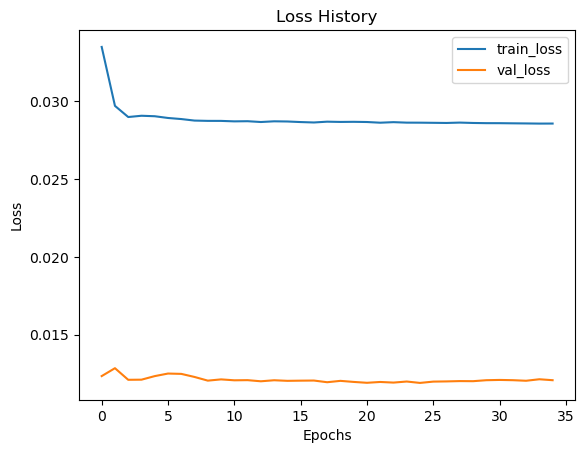

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

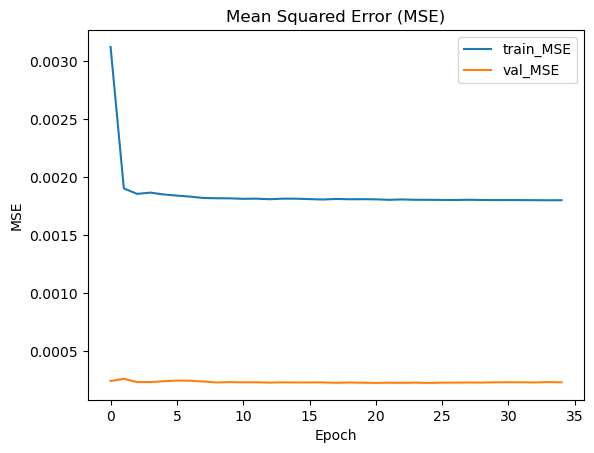

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

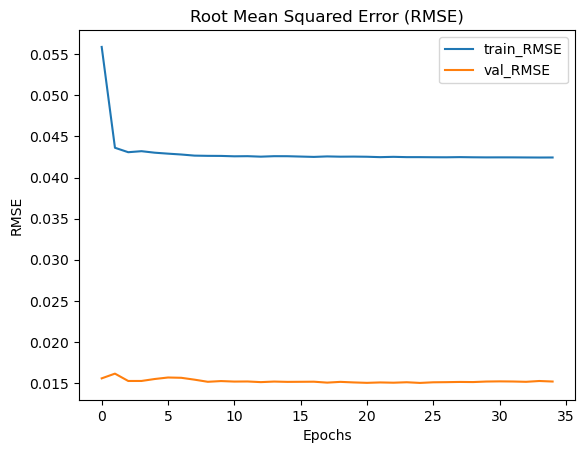

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

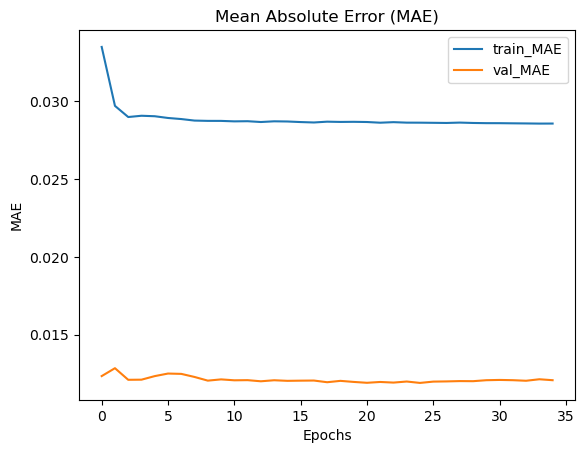

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

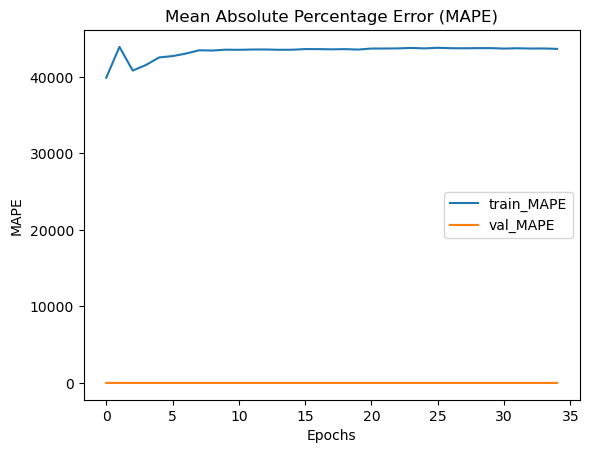

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-15 00:28:25.834363: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7558, 40, 1)
Labels Shape: (7558, 5, 1)
Prediction Shape: (7558, 5, 10)


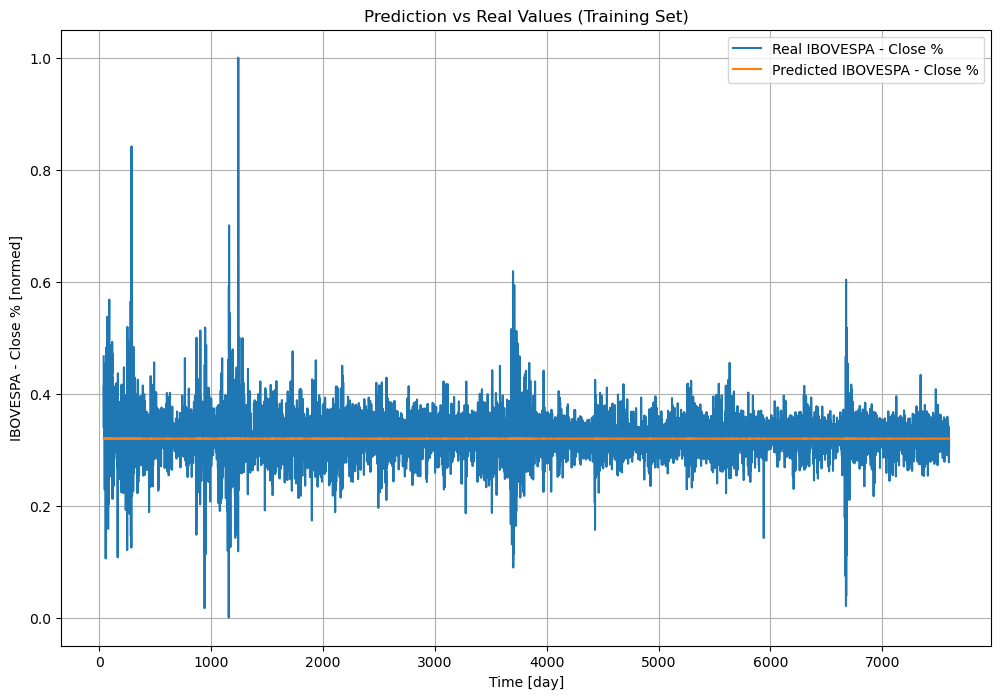

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 1)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


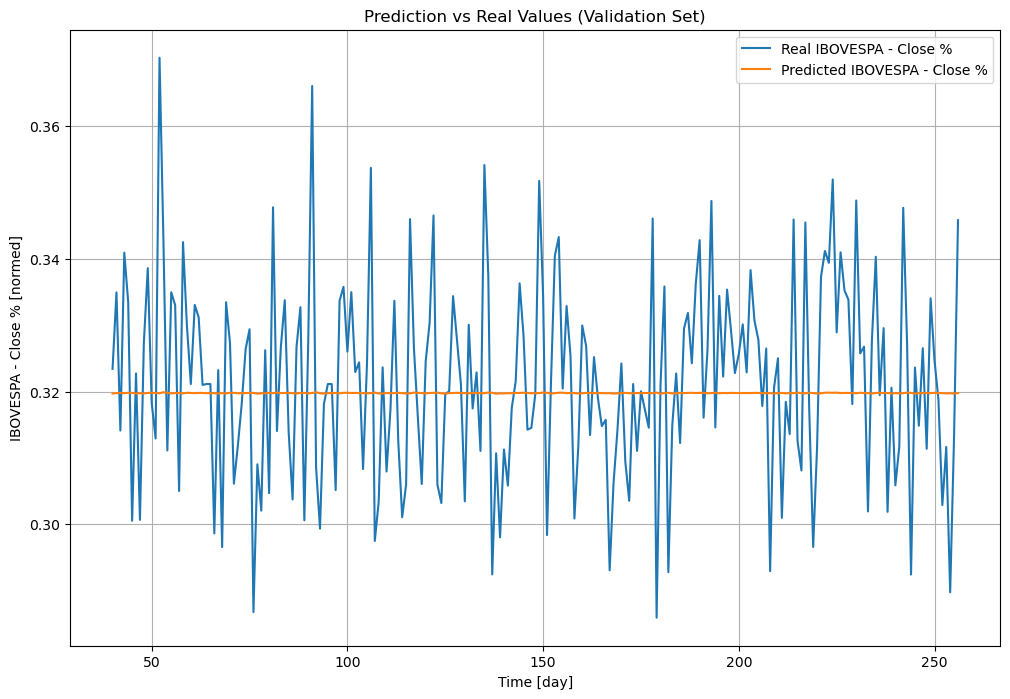

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 1)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


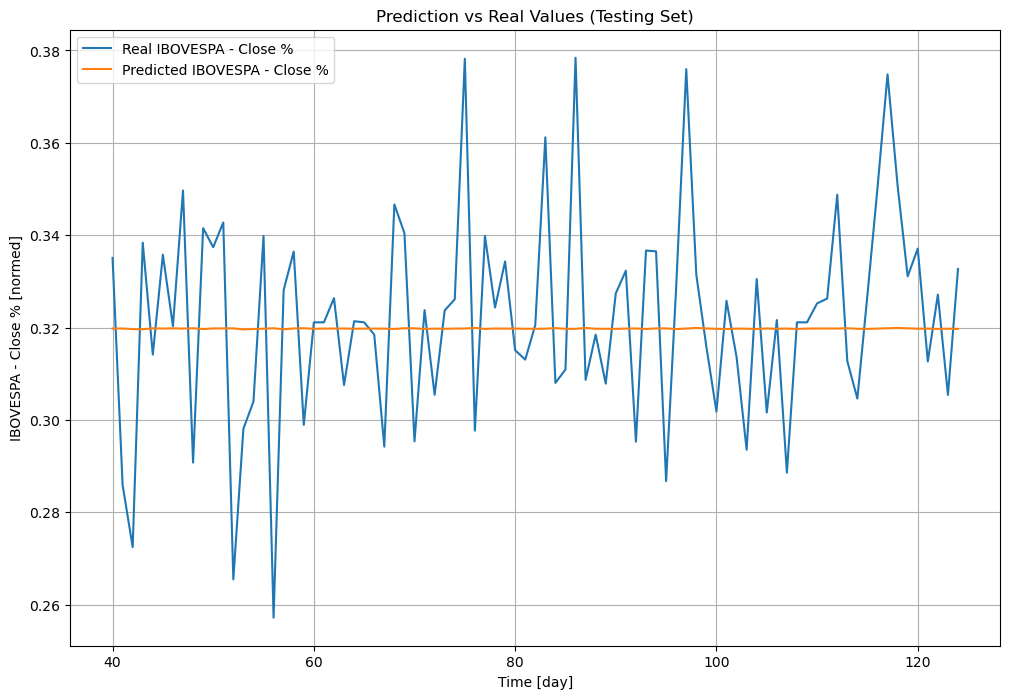

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

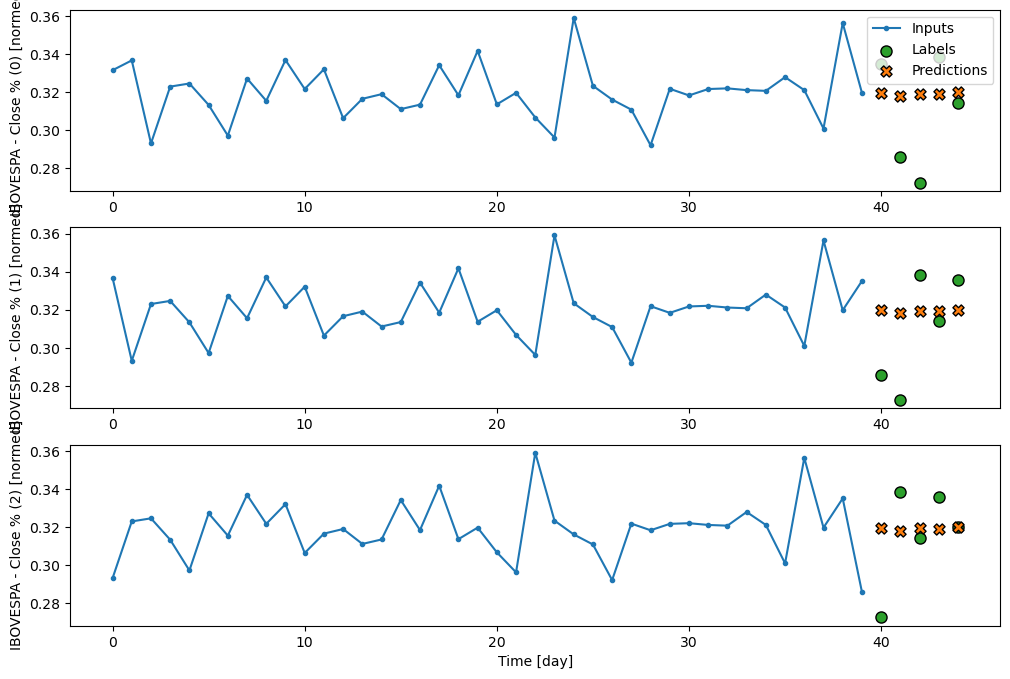

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:4m:8s:179ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


array([[[0.31977767, 0.31977767, 0.31977767, ..., 0.31977767,
         0.31977767, 0.31977767],
        [0.31824315, 0.31824315, 0.31824315, ..., 0.31824315,
         0.31824315, 0.31824315],
        [0.3192765 , 0.3192765 , 0.3192765 , ..., 0.3192765 ,
         0.3192765 , 0.3192765 ],
        [0.31908068, 0.31908068, 0.31908068, ..., 0.31908068,
         0.31908068, 0.31908068],
        [0.32014325, 0.32014325, 0.32014325, ..., 0.32014325,
         0.32014325, 0.32014325]],

       [[0.31980032, 0.31980032, 0.31980032, ..., 0.31980032,
         0.31980032, 0.31980032],
        [0.31827804, 0.31827804, 0.31827804, ..., 0.31827804,
         0.31827804, 0.31827804],
        [0.31923017, 0.31923017, 0.31923017, ..., 0.31923017,
         0.31923017, 0.31923017],
        [0.3190581 , 0.3190581 , 0.3190581 , ..., 0.3190581 ,
         0.3190581 , 0.3190581 ],
        [0.3201004 , 0.3201004 , 0.3201004 , ..., 0.3201004 ,
         0.3201004 , 0.3201004 ]],

       [[0.31966528, 0.31966528, 0.3

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')